# 1- Dataset overview & general preprocessing

First step is reading the dataset to get an intial look at its composition


In [147]:
import pandas as pd
import json

data_file_name = "concertation_logement_etudiants_en_metropole.json"

# Load the JSON file
with open(data_file_name, "r", encoding="utf-8") as file:
    data = json.load(file)

# Flatten nested JSON into a DataFrame
df = pd.json_normalize(data)

df.head()

numberMatched  numberReturned  \
0            280             280   

                                             records  \
0  [{'@id': '1', '1_niveau_d_etude': 'Master', '2...   

                                               links  
0  [{'href': 'https://data.lillemetropole.fr/data...

The dataset is composed of 4 columns the columns "numberMatched", "numberReturned" and "Links" contains meta-data about the dataset while the column "records" contains the actual data that we will analyse

In [148]:
#extract the data from the records entry of the json file

with open(data_file_name, "r", encoding="utf-8") as file:
    data = json.load(file)

records = data["records"]
df = pd.DataFrame(records)
df.head()

@id     1_niveau_d_etude              2_tu_etudies  \
0   1               Master       Au sein d'une école   
1   2               Master  Au sein d'une université   
2   3  BTS - DUT - Licence  Au sein d'une université   
3   4  BTS - DUT - Licence  Au sein d'une université   
4   5  BTS - DUT - Licence  Au sein d'une université   

  3_es_tu_un_etudiant_etranger           4_travailles_tu_si_oui_est_ce  \
0                          Non  En dehors de tes études (job étudiant)   
1                          Non                                    None   
2                          Non  En dehors de tes études (job étudiant)   
3                          Non  En dehors de tes études (job étudiant)   
4                          Non                                    None   

  5_ton_logement_est_un                         6_ton_logement_est  \
0                    T1                             Logement privé   
1                Studio                             Logement privé   
2                 Autre                             Logement privé   
3                 Autre  Dans une résidence universitaire du CROUS   
4                Studio                             Logement privé   

  7_avec_qui_vis_tu 8_selon_toi_ton_logement_est_il  \
0         En couple        Loin de ton lieu d'étude   
1              Seul        Loin de ton lieu d'étude   
2   Chez l'habitant        Loin de ton lieu d'étude   
3              Seul        Près de ton lieu d'étude   
4              Seul        Loin de ton lieu d'étude   

  9_parmi_ces_propositions_quelles_sont_les_priorites_pour_un_log  \
0  Un logement spacieux, Un loyer peu élévé (char...                
1  Un loyer peu élévé (charges comprises), Vivre ...                
2  Un loyer peu élévé (charges comprises), Un log...                
3  Un loyer peu élévé (charges comprises), Un log...                
4  Vivre seul, Un logement proche du centre-ville...                

  10_ton_logement_repond_il_aux_priorites_que_tu_as_citees_preced  \
0                                                Non                
1                                                Oui                
2                                                Non                
3                                                Oui                
4                                                Oui                

                            11_tu_souhaites_preciser  \
0                                               None   
1  J'aurais voulu aussi citer "Un logement spacie...   
2  J'étudie au campus Moulin (anciennement Lille ...   
3                                               None   
4                                               None   

  12_comment_as_tu_trouve_ton_logement_actuel_tu_as_rencontre_des  \
0                   J'ai emménagé chez ma partenaire                
1  Sur Leboncoin. \r\nEtant originaire de Savoie,...                
2                             Trouvé sur le bon coin                
3  J'ai trouvé mon logement grâce à l'ancienne pl...                
4  Sur leboncoin, ça a été compliqué, voire très ...                

  13_penses_tu_changer_de_logement_etudiant_et_si_oui_quelles_en_  \
0  Oui, pour avoir un logement plus spacieux, mie...                
1  Si je reste réaliste, je ne changerais pas de ...                
2  - Le logement est éloigné de ma fac\r\n- je n'...                
3  Oui, par manque d'espace. J'ai conscience que ...                
4  j'aimerais bien mais ma famille est trop loin ...                

  14_quelles_sont_tes_envies_et_attentes_concernant_le_quartier_d  \
0     sécurité, activité, commerces, bonne ambiance.                
1  Habitant entre Wazemmes et Porte des Postes, j...                
2  Avoir un accès simple aux transports aux commu...                
3  Avoir un campus universitaire ressemblant à ce...                
4  Mon quartier de prédilection c'est le quartier...                

  15_quel_est_ton_loyer_mensuel  \
0                 Plu

In [149]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   @id                                                              280 non-null    object
 1   1_niveau_d_etude                                                 278 non-null    object
 2   2_tu_etudies                                                     280 non-null    object
 3   3_es_tu_un_etudiant_etranger                                     280 non-null    object
 4   4_travailles_tu_si_oui_est_ce                                    192 non-null    object
 5   5_ton_logement_est_un                                            280 non-null    object
 6   6_ton_logement_est                                               277 non-null    object
 7   7_avec_qui_vis_tu                                    

We observe that the dataset contains 280 lines (just as indicated by the dataset's meta-data tags), it has 20 columns corresponding to the students' answers to the survey's questions all of them of type object, we are also able to see for each attribute, the number of non null entries as well the number of unique values, the most common value and its frequency.

The @id column representing the id of the response will be dropped as it doesn't provide any information (redundant with the row's index)

In [150]:
df = df.drop(["@id"], axis=1)
df.columns

Index(['1_niveau_d_etude', '2_tu_etudies', '3_es_tu_un_etudiant_etranger',
       '4_travailles_tu_si_oui_est_ce', '5_ton_logement_est_un',
       '6_ton_logement_est', '7_avec_qui_vis_tu',
       '8_selon_toi_ton_logement_est_il',
       '9_parmi_ces_propositions_quelles_sont_les_priorites_pour_un_log',
       '10_ton_logement_repond_il_aux_priorites_que_tu_as_citees_preced',
       '11_tu_souhaites_preciser',
       '12_comment_as_tu_trouve_ton_logement_actuel_tu_as_rencontre_des',
       '13_penses_tu_changer_de_logement_etudiant_et_si_oui_quelles_en_',
       '14_quelles_sont_tes_envies_et_attentes_concernant_le_quartier_d',
       '15_quel_est_ton_loyer_mensuel',
       '16_une_fois_ton_loyer_paye_estimes_tu_qu_il_te_reste_assez_d_ar',
       '17_connais_tu_ces_autres_types_de_logement',
       '18_en_connais_tu_d_autres',
       '19_aimerais_tu_vivre_dans_ce_type_de_logement'],
      dtype='object')

Next we will give more meaningful names to the dataset's columns in order to make them more easily readable, interpertable and visualisable

In [151]:
new_col_names = [
    "Niveau_Etudes",  # 1_niveau_d_etude
    "Type_Etablissement",  # 2_tu_etudies
    "Etudiant_Etranger",  # 3_es_tu_un_etudiant_etranger
    "Travail_Et_Type",  # 4_travailles_tu_si_oui_est_ce
    "Configuration_Logement",  # 5_ton_logement_est_un
    "Type_Logement",  # 6_ton_logement_est
    "Cohabitation",  # 7_avec_qui_vis_tu
    "Proximite_lieux_Etudes",  # 8_selon_toi_ton_logement_est_il
    "Priorites_Logement",  # 9_parmi_ces_propositions_quelles_sont_les_priorites_pour_un_log
    "Satisfaction_Logement",  # 10_ton_logement_repond_il_aux_priorites_que_tu_as_citees_preced
    "Precisions_Satisfaction",  # 11_tu_souhaites_preciser
    "Methode_Recherche_Logement_Et_Difficulte",  # 12_comment_as_tu_trouve_ton_logement_actuel_tu_as_rencontre_des
    "Volonte_Changement_Logement_Et_Raison",  # 13_penses_tu_changer_de_logement_etudiant_et_si_oui_quelles_en_
    "Attentes_Quartier",  # 14_quelles_sont_tes_envies_et_attentes_concernant_le_quartier_d
    "Fourchette_Loyer",  # 15_quel_est_ton_loyer_mensuel
    "Ressources_Suffisantes_Apres_Loyer",  # 16_une_fois_ton_loyer_paye_estimes_tu_qu_il_te_reste_assez_d_ar
    "Autres_Types_Logement_Parmis_Choix_Multiple",  # 17_connais_tu_ces_autres_types_de_logement
    "Autres_Types_Logement_Libre",  # 18_en_connais_tu_d_autres
    "Volonte_Vivre_Autre_Type"  # 19_aimerais_tu_vivre_dans_ce_type_de_logement
]

df.columns = new_col_names
df.head()


Niveau_Etudes        Type_Etablissement Etudiant_Etranger  \
0               Master       Au sein d'une école               Non   
1               Master  Au sein d'une université               Non   
2  BTS - DUT - Licence  Au sein d'une université               Non   
3  BTS - DUT - Licence  Au sein d'une université               Non   
4  BTS - DUT - Licence  Au sein d'une université               Non   

                          Travail_Et_Type Configuration_Logement  \
0  En dehors de tes études (job étudiant)                     T1   
1                                    None                 Studio   
2  En dehors de tes études (job étudiant)                  Autre   
3  En dehors de tes études (job étudiant)                  Autre   
4                                    None                 Studio   

                               Type_Logement     Cohabitation  \
0                             Logement privé        En couple   
1                             Logement privé             Seul   
2                             Logement privé  Chez l'habitant   
3  Dans une résidence universitaire du CROUS             Seul   
4                             Logement privé             Seul   

     Proximite_lieux_Etudes  \
0  Loin de ton lieu d'étude   
1  Loin de ton lieu d'étude   
2  Loin de ton lieu d'étude   
3  Près de ton lieu d'étude   
4  Loin de ton lieu d'étude   

                                  Priorites_Logement Satisfaction_Logement  \
0  Un logement spacieux, Un loyer peu élévé (char...                   Non   
1  Un loyer peu élévé (charges comprises), Vivre ...                   Oui   
2  Un loyer peu élévé (charges comprises), Un log...                   Non   
3  Un loyer peu élévé (charges comprises), Un log...                   Oui   
4  Vivre seul, Un logement proche du centre-ville...                   Oui   

                             Precisions_Satisfaction  \
0                                               None   
1  J'aurais voulu aussi citer "Un logement spacie...   
2  J'étudie au campus Moulin (anciennement Lille ...   
3                                               None   
4                                               None   

            Methode_Recherche_Logement_Et_Difficulte  \
0                   J'ai emménagé chez ma partenaire   
1  Sur Leboncoin. \r\nEtant originaire de Savoie,...   
2                             Trouvé sur le bon coin   
3  J'ai trouvé mon logement grâce à l'ancienne pl...   
4  Sur leboncoin, ça a été compliqué, voire très ...   

               Volonte_Changement_Logement_Et_Raison  \
0  Oui, pour avoir un logement plus spacieux, mie...   
1  Si je reste réaliste, je ne changerais pas de ...   
2  - Le logement est éloigné de ma fac\r\n- je n'...   
3  Oui, par manque d'espace. J'ai conscience que ...   
4  j'aimerais bien mais ma famille est trop loin ...   

                                   Attentes_Quartier    Fourchette_Loyer  \
0     sécurité, activité, commerces, bonne ambiance.       Plus de 450 €   
1  Habitant entre Wazemmes et Porte des Postes, j...  Entre 250 et 450 €   
2  Avoir un accès simple aux transports aux commu...  Entre 250 et 450 €   
3  Avoir un campus universitaire ressemblant à ce...  Entre 250 et 450 €   
4  Mon quartier de prédilection c'est le quartier...  Entre 250 et 450 €   

  Ressources_Suffisantes_Apres_Loyer  \
0                                Non   
1                                Non   
2                                Non   
3                                Oui   
4                                Non   

         Autres_Types_Logement_Parmis_Choix_Multiple  \
0  La cohabitation intergénérationnelle (contribu...   
1  Les colocations solidaires (installation en  c...   
2  Les colocations solidaires (installation en  c...   
3                                               None   
4                                               None   

  Autres_Types_Logement_Libre  \
0                        None   
1                   

Now that the dataset's columns have more representative names let's find out more about the possible values for each column and its types which can either be categorical (answer to a multiple choice question) or free text (text field)

In [152]:
summary = {}
for column in df.columns:
    unique_values = df[column].dropna().unique()  # Drop NaN values
    unique_count = len(unique_values)
    col_type = "Categorical" if unique_count <= 20 else "Free-text"
    range_of_values = unique_values[:10].tolist() # Display the first 10 unique values
    summary[column] = {"Type": col_type, "Number of values": unique_count, "Range of Values": range_of_values}

categoricals = [column for column in df.columns if summary[column]["Type"] == "Categorical"]
free_texts = df.columns.difference(categoricals).to_list()
# Create a DataFrame with two columns: Categorical and Free-text
max_len = max(len(categoricals), len(free_texts))  # Ensure both columns have the same length
categoricals += [""] * (max_len - len(categoricals))  # Pad with empty strings if needed
free_texts += [""] * (max_len - len(free_texts))

column_types = pd.DataFrame({"Categorical attributes": categoricals, "Free text attributes": free_texts})

# Display the types table
from IPython.display import display
print("1- Classification of the dataset's columns by type")
display(column_types)

print("2- Details for each column")
for col in summary.keys():
    print(f"Column: {col}")
    print("Type:", {summary[col]["Type"]})
    print(f"Unique Values ({summary[col]["Number of values"]}): {summary[col]["Range of Values"]}")  # 
    print("-" * 50)

free_texts = free_texts[0:7]

1- Classification of the dataset's columns by type


Categorical attributes  \
0                                 Niveau_Etudes   
1                            Type_Etablissement   
2                             Etudiant_Etranger   
3                               Travail_Et_Type   
4                        Configuration_Logement   
5                                 Type_Logement   
6                                  Cohabitation   
7                        Proximite_lieux_Etudes   
8                         Satisfaction_Logement   
9                              Fourchette_Loyer   
10           Ressources_Suffisantes_Apres_Loyer   
11  Autres_Types_Logement_Parmis_Choix_Multiple   

                        Free text attributes  
0                          Attentes_Quartier  
1                Autres_Types_Logement_Libre  
2   Methode_Recherche_Logement_Et_Difficulte  
3                    Precisions_Satisfaction  
4                         Priorites_Logement  
5      Volonte_Changement_Logement_Et_Raison  
6                   Volonte_Vivre_Autre_Type  
7                                             
8                                             
9                                             
10                                            
11

2- Details for each column
Column: Niveau_Etudes
Type: {'Categorical'}
Unique Values (3): ['Master', 'BTS - DUT - Licence', 'Doctorat']
--------------------------------------------------
Column: Type_Etablissement
Type: {'Categorical'}
Unique Values (2): ["Au sein d'une école", "Au sein d'une université"]
--------------------------------------------------
Column: Etudiant_Etranger
Type: {'Categorical'}
Unique Values (2): ['Non', 'Oui']
--------------------------------------------------
Column: Travail_Et_Type
Type: {'Categorical'}
Unique Values (2): ['En dehors de tes études (job étudiant)', 'Dans le cadre de tes études (stage, apprentissage)']
--------------------------------------------------
Column: Configuration_Logement
Type: {'Categorical'}
Unique Values (4): ['T1', 'Studio', 'Autre', 'T2']
--------------------------------------------------
Column: Type_Logement
Type: {'Categorical'}
Unique Values (6): ['Logement privé', 'Dans une résidence universitaire du CROUS', 'Logement soci

As we can see 7 of the 19 columns are free_text: Priorites_Logement, Precisions_Satisfaction, Methode_Recherche_Logement_Et_Difficulte, Volonte_Changement_Logement_Et_Raison, Attentes_Quartier, Autres_Types_Logement_Libre, Volonte_Vivre_Autre_Type. These columns require specific preprocessing in order for us to be able to extract useful information from them.

Another remark relates to the values that some of the columns take such as ["Au sein d'une école", "Au sein d'une université"] for "Type_Etablissement", these values can be simply rewritten as "Ecole" and "Université" respectively for the sake of concision and easier visualisation later on. A similar observation can be made about the columns "Travail_Et_Type", "Proximite_Lieu_Etudes"

Discuised as a free_text column, "Priorites_Logement" is actually a multi-value column whose value in any given row is actually a combination of a number of possible choices (Multiple choice question with checkbox rather than a radio button)

In [153]:
# "Priorites_Logement" is not a free_text variable
free_texts.remove("Priorites_Logement")
# extracting the values from Attentes_quartier
possible_values=[value.strip() for values in df["Priorites_Logement"].unique().tolist() for value in values.split(",")]
possible_values = list(set(possible_values))
possible_values

["Avoir des espaces partagés avec d'autres personnes",
 'Autre',
 'Un jardin ou une terrasse',
 'Un logement proche du centre-ville',
 "Un logement proche du lieu d'étude",
 'Un loyer peu élévé (charges comprises)',
 'Un logement proche des transports',
 'Vivre seul',
 'Un logement spacieux']

This requires special preprocessing such as one-hot-encoding on the lists of answers, but for now we will just split the values into a list

In [154]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Split multi-value column into lists
df['Priorites_Logement'] = df['Priorites_Logement'].dropna().apply(lambda x: [item.strip() for item in x.split(',')])

# # Step 2: Convert multi-value column into binary columns
# mlb = MultiLabelBinarizer()
# priorites_binary = pd.DataFrame(
#     mlb.fit_transform(df['Priorites_Logement_Split'].dropna()),
#     columns=mlb.classes_,
#     index=df['Priorites_Logement_Split'].dropna().index
# )

# # Step 3: Add binary columns back to the original DataFrame
# df = pd.concat([df, priorites_binary], axis=1)


df.head()

Niveau_Etudes        Type_Etablissement Etudiant_Etranger  \
0               Master       Au sein d'une école               Non   
1               Master  Au sein d'une université               Non   
2  BTS - DUT - Licence  Au sein d'une université               Non   
3  BTS - DUT - Licence  Au sein d'une université               Non   
4  BTS - DUT - Licence  Au sein d'une université               Non   

                          Travail_Et_Type Configuration_Logement  \
0  En dehors de tes études (job étudiant)                     T1   
1                                    None                 Studio   
2  En dehors de tes études (job étudiant)                  Autre   
3  En dehors de tes études (job étudiant)                  Autre   
4                                    None                 Studio   

                               Type_Logement     Cohabitation  \
0                             Logement privé        En couple   
1                             Logement privé             Seul   
2                             Logement privé  Chez l'habitant   
3  Dans une résidence universitaire du CROUS             Seul   
4                             Logement privé             Seul   

     Proximite_lieux_Etudes  \
0  Loin de ton lieu d'étude   
1  Loin de ton lieu d'étude   
2  Loin de ton lieu d'étude   
3  Près de ton lieu d'étude   
4  Loin de ton lieu d'étude   

                                  Priorites_Logement Satisfaction_Logement  \
0  [Un logement spacieux, Un loyer peu élévé (cha...                   Non   
1  [Un loyer peu élévé (charges comprises), Vivre...                   Oui   
2  [Un loyer peu élévé (charges comprises), Un lo...                   Non   
3  [Un loyer peu élévé (charges comprises), Un lo...                   Oui   
4  [Vivre seul, Un logement proche du centre-vill...                   Oui   

                             Precisions_Satisfaction  \
0                                               None   
1  J'aurais voulu aussi citer "Un logement spacie...   
2  J'étudie au campus Moulin (anciennement Lille ...   
3                                               None   
4                                               None   

            Methode_Recherche_Logement_Et_Difficulte  \
0                   J'ai emménagé chez ma partenaire   
1  Sur Leboncoin. \r\nEtant originaire de Savoie,...   
2                             Trouvé sur le bon coin   
3  J'ai trouvé mon logement grâce à l'ancienne pl...   
4  Sur leboncoin, ça a été compliqué, voire très ...   

               Volonte_Changement_Logement_Et_Raison  \
0  Oui, pour avoir un logement plus spacieux, mie...   
1  Si je reste réaliste, je ne changerais pas de ...   
2  - Le logement est éloigné de ma fac\r\n- je n'...   
3  Oui, par manque d'espace. J'ai conscience que ...   
4  j'aimerais bien mais ma famille est trop loin ...   

                                   Attentes_Quartier    Fourchette_Loyer  \
0     sécurité, activité, commerces, bonne ambiance.       Plus de 450 €   
1  Habitant entre Wazemmes et Porte des Postes, j...  Entre 250 et 450 €   
2  Avoir un accès simple aux transports aux commu...  Entre 250 et 450 €   
3  Avoir un campus universitaire ressemblant à ce...  Entre 250 et 450 €   
4  Mon quartier de prédilection c'est le quartier...  Entre 250 et 450 €   

  Ressources_Suffisantes_Apres_Loyer  \
0                                Non   
1                                Non   
2                                Non   
3                                Oui   
4                                Non   

         Autres_Types_Logement_Parmis_Choix_Multiple  \
0  La cohabitation intergénérationnelle (contribu...   
1  Les colocations solidaires (installation en  c...   
2  Les colocations solidaires (installation en  c...   
3                                               None   
4                                               None   

  Autres_Types_Logement_Libre  \
0                        None   
1                   

In [155]:
# Replacing lengthy values to concise ones
replacements = {
    "Au sein d'une école": "Ecole",
    "Au sein d'une université": "Université",
    "En dehors de tes études (job étudiant)": "Job étudiant",
    "Dans le cadre de tes études (stage, apprentissage)": "Stage/Alternance",
    "Dans une résidence universitaire du CROUS":"CROUS",
    "Une résidence étudiante privée":"Résidence étudiante privée",
    "Un logement réservé aux étudiants d'une ou plusieurs écoles (ex: AEU de l'Université Catholique de Lille)":"Logement exclusif à certains établissements",
    "Hébergé chez la famille (parents, grands-parents, etc.)":"Chez la famille",
    "Loin de ton lieu d'étude": "Loin",
    "Près de ton lieu d'étude": "Près", 
    "Plus de 450 €": ">450 €",
    "Entre 250 et 450 €":"250-450 €",
    "Entre 0 et 250 €":"0-250 €",
    "La cohabitation intergénérationnelle (contribue à rompre l'isolement des personnes âgées)": "Cohabitation intergénérationnelle",
    "Les colocations solidaires (installation en  colocation et participations à la vie citoyenne du quartier d'implantation, en contrepartie d'un loyer modéré)": "Colocations solidaires",
    "Le choix de la ruralité (vie à la ferme avec également un loyer modéré)": "Logements rurals"
}

df.replace(replacements, inplace=True)
df.head()


Niveau_Etudes Type_Etablissement Etudiant_Etranger Travail_Et_Type  \
0               Master              Ecole               Non    Job étudiant   
1               Master         Université               Non            None   
2  BTS - DUT - Licence         Université               Non    Job étudiant   
3  BTS - DUT - Licence         Université               Non    Job étudiant   
4  BTS - DUT - Licence         Université               Non            None   

  Configuration_Logement   Type_Logement     Cohabitation  \
0                     T1  Logement privé        En couple   
1                 Studio  Logement privé             Seul   
2                  Autre  Logement privé  Chez l'habitant   
3                  Autre           CROUS             Seul   
4                 Studio  Logement privé             Seul   

  Proximite_lieux_Etudes                                 Priorites_Logement  \
0                   Loin  [Un logement spacieux, Un loyer peu élévé (cha...   
1                   Loin  [Un loyer peu élévé (charges comprises), Vivre...   
2                   Loin  [Un loyer peu élévé (charges comprises), Un lo...   
3                   Près  [Un loyer peu élévé (charges comprises), Un lo...   
4                   Loin  [Vivre seul, Un logement proche du centre-vill...   

  Satisfaction_Logement                            Precisions_Satisfaction  \
0                   Non                                               None   
1                   Oui  J'aurais voulu aussi citer "Un logement spacie...   
2                   Non  J'étudie au campus Moulin (anciennement Lille ...   
3                   Oui                                               None   
4                   Oui                                               None   

            Methode_Recherche_Logement_Et_Difficulte  \
0                   J'ai emménagé chez ma partenaire   
1  Sur Leboncoin. \r\nEtant originaire de Savoie,...   
2                             Trouvé sur le bon coin   
3  J'ai trouvé mon logement grâce à l'ancienne pl...   
4  Sur leboncoin, ça a été compliqué, voire très ...   

               Volonte_Changement_Logement_Et_Raison  \
0  Oui, pour avoir un logement plus spacieux, mie...   
1  Si je reste réaliste, je ne changerais pas de ...   
2  - Le logement est éloigné de ma fac\r\n- je n'...   
3  Oui, par manque d'espace. J'ai conscience que ...   
4  j'aimerais bien mais ma famille est trop loin ...   

                                   Attentes_Quartier Fourchette_Loyer  \
0     sécurité, activité, commerces, bonne ambiance.           >450 €   
1  Habitant entre Wazemmes et Porte des Postes, j...        250-450 €   
2  Avoir un accès simple aux transports aux commu...        250-450 €   
3  Avoir un campus universitaire ressemblant à ce...        250-450 €   
4  Mon quartier de prédilection c'est le quartier...        250-450 €   

  Ressources_Suffisantes_Apres_Loyer  \
0                                Non   
1                                Non   
2                                Non   
3                                Oui   
4                                Non   

  Autres_Types_Logement_Parmis_Choix_Multiple Autres_Types_Logement_Libre  \
0           Cohabitation intergénérationnelle                        None   
1                      Colocations solidaires                        None   
2                      Colocations solidaires                         Non   
3                                        None                        None   
4                                        None                         Non   

                            Volonte_Vivre_Autre_Type  
0  J'aurais aimé le faire pendant mes premières a...  
1  Non, car je suis quelqu'un de plutôt solitaire...  
2  Le souci des colocations solidaires et de la c...  
3                         Ça m'intéressait beaucoup.  
4  Non, j'ai besoin d'intimité, je veux vivre seu...

# 2- EDA: Exploratory data analysis

Niveau_Etudes                                    2
Type_Etablissement                               0
Etudiant_Etranger                                0
Travail_Et_Type                                 88
Configuration_Logement                           0
Type_Logement                                    3
Cohabitation                                     1
Proximite_lieux_Etudes                           0
Priorites_Logement                               0
Satisfaction_Logement                            1
Precisions_Satisfaction                        176
Methode_Recherche_Logement_Et_Difficulte        54
Volonte_Changement_Logement_Et_Raison           71
Attentes_Quartier                               62
Fourchette_Loyer                                18
Ressources_Suffisantes_Apres_Loyer              18
Autres_Types_Logement_Parmis_Choix_Multiple     83
Autres_Types_Logement_Libre                    177
Volonte_Vivre_Autre_Type                        42
dtype: int64


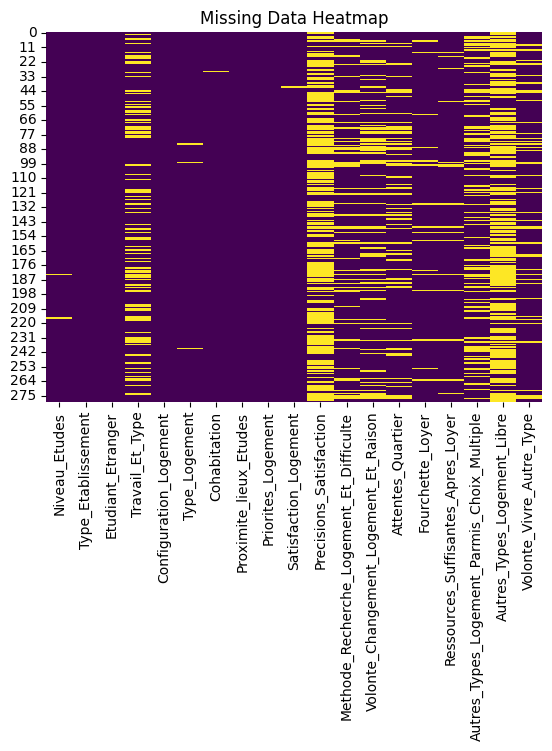

In [156]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt
# Count missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


When it comes to null values there a clear divide, with free_text columns having conciderably more null entries than categorical ones. This is dues to the fact that many of the survey's participants chose to answer only the quick miltiple choice questions with predefined propositions rather than write their own responses for open ended questions. This however doesnt mean that we can't draw insight from the free_text responses

A notable exception among categorical variables is "Travail_Et_Type" which has a noticeable number of null entries, this is probably due to the fact that those who don't work take the value null for the question (travailles_tu_si_oui_est_ce) meaning that it should be replaced with "Aucun travail" 

In [157]:
df["Travail_Et_Type"].fillna("Aucun travail", inplace=True)

C:\Users\Youcef Islam\AppData\Local\Temp\ipykernel_8384\3350560508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Travail_Et_Type"].fillna("Aucun travail", inplace=True)


After dealing with the special case where a null values represents a specific information, lets visualise for each column the proportion of its null entries


C:\Users\Youcef Islam\AppData\Local\Temp\ipykernel_8384\592214578.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Column', x='Proportion of Null Entries', data=categoricals_missing_proportion, palette='Blues_r')


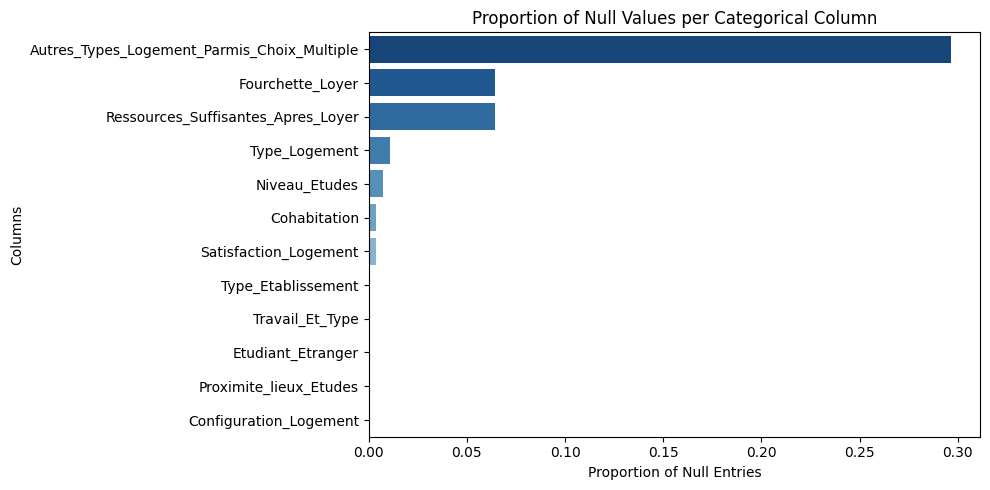

C:\Users\Youcef Islam\AppData\Local\Temp\ipykernel_8384\592214578.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Column', x='Proportion of Null Entries', data=free_texts_missing_proportion, palette='Blues_r')


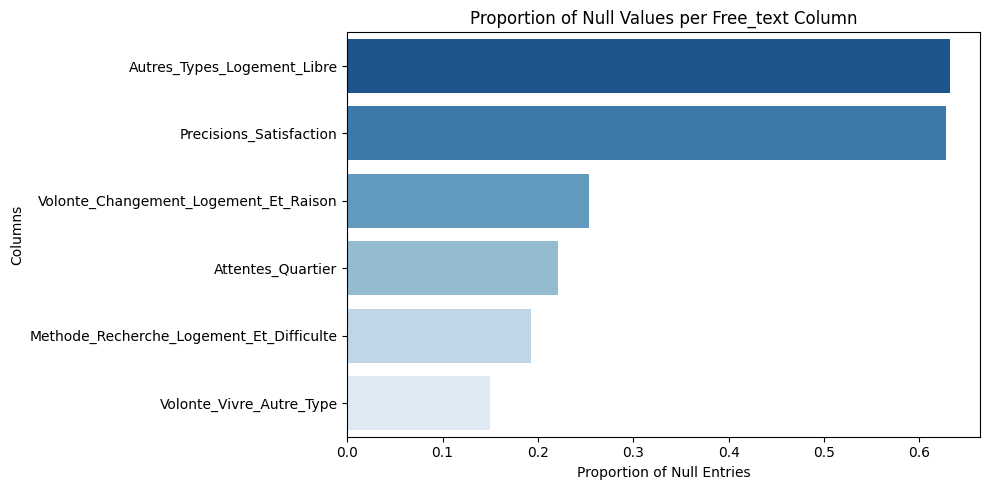

In [158]:
categoricals_missing_proportion = df[categoricals].isnull().mean()  # null % for categorical attributes
free_texts_missing_proportion = df[free_texts].isnull().mean() # null % for free_text attributes

# Convert to DataFrame for visualization
categoricals_missing_proportion = categoricals_missing_proportion.reset_index()
categoricals_missing_proportion.columns = ['Column', 'Proportion of Null Entries']

free_texts_missing_proportion = free_texts_missing_proportion.reset_index()
free_texts_missing_proportion.columns = ['Column', 'Proportion of Null Entries']

# Sort by proportion for better visualization
categoricals_missing_proportion = categoricals_missing_proportion.sort_values(by='Proportion of Null Entries', ascending=False)
free_texts_missing_proportion = free_texts_missing_proportion.sort_values(by='Proportion of Null Entries', ascending=False)

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(y='Column', x='Proportion of Null Entries', data=categoricals_missing_proportion, palette='Blues_r')
plt.title("Proportion of Null Values per Categorical Column")
plt.xlabel("Proportion of Null Entries")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(y='Column', x='Proportion of Null Entries', data=free_texts_missing_proportion, palette='Blues_r')
plt.title("Proportion of Null Values per Free_text Column")
plt.xlabel("Proportion of Null Entries")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


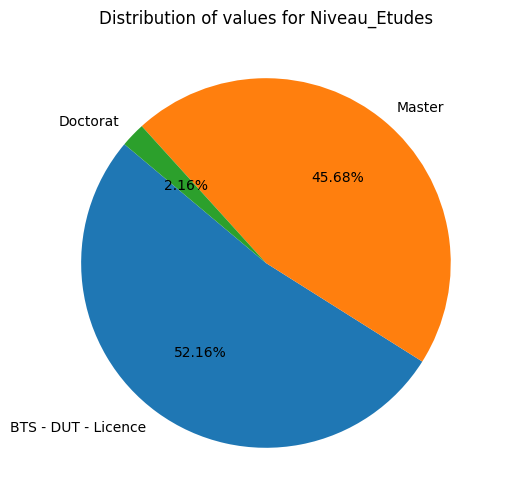

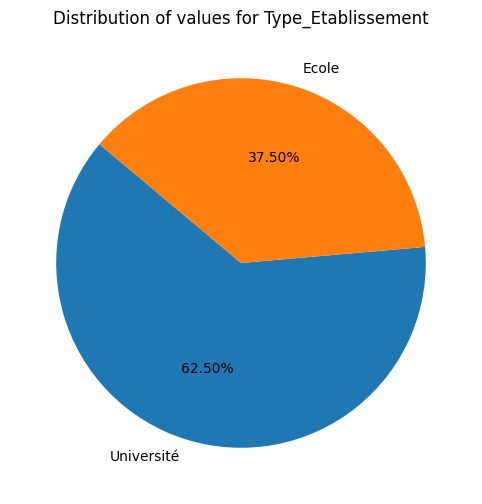

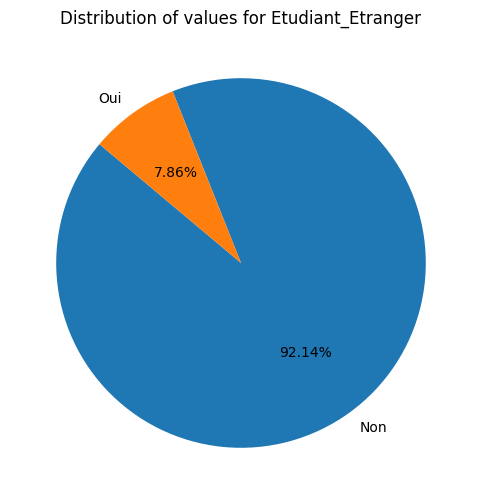

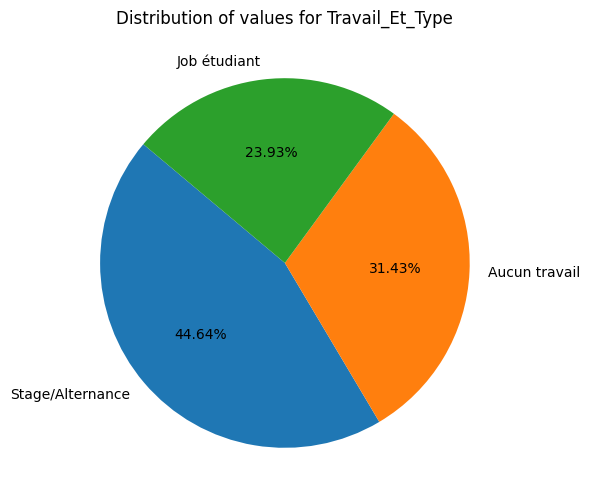

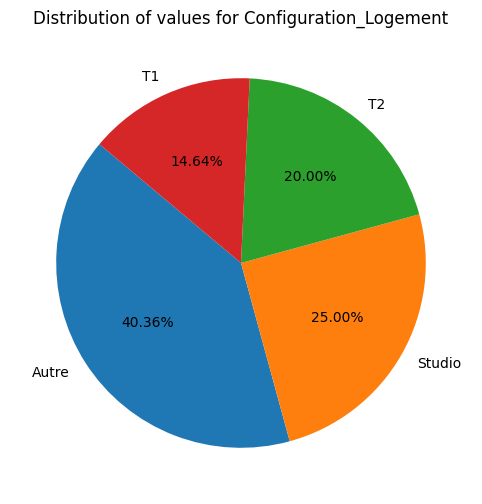

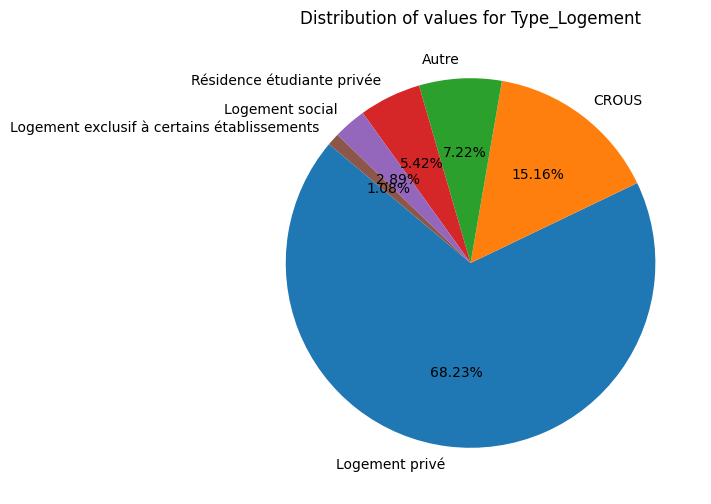

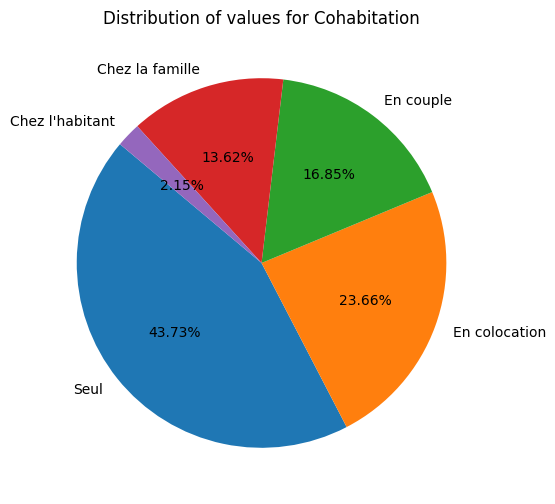

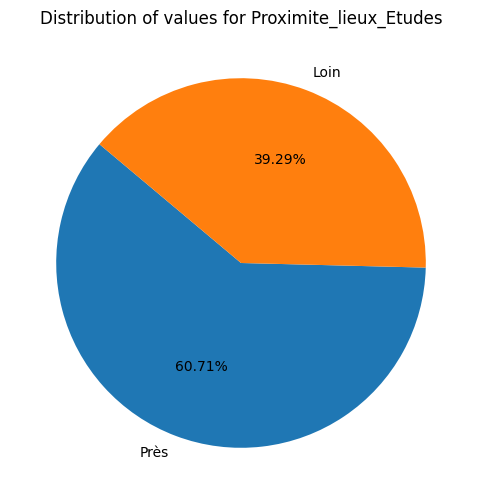

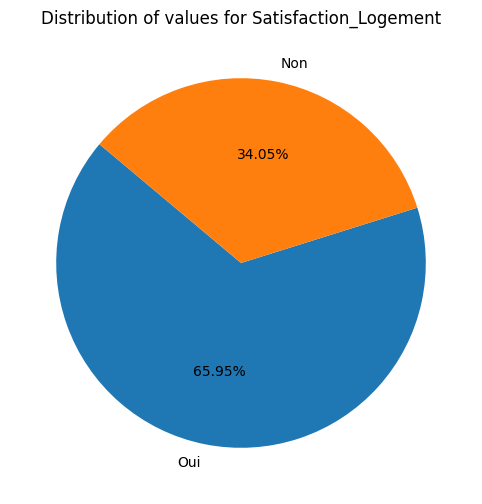

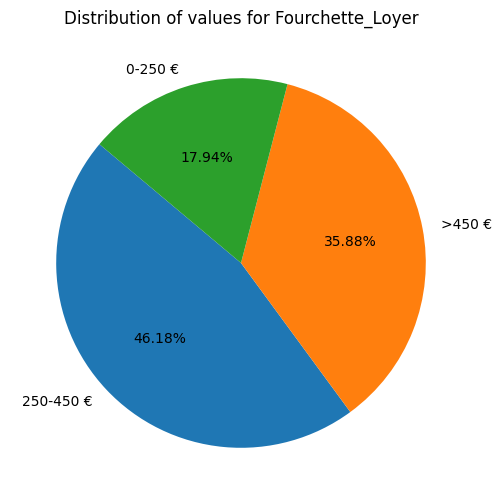

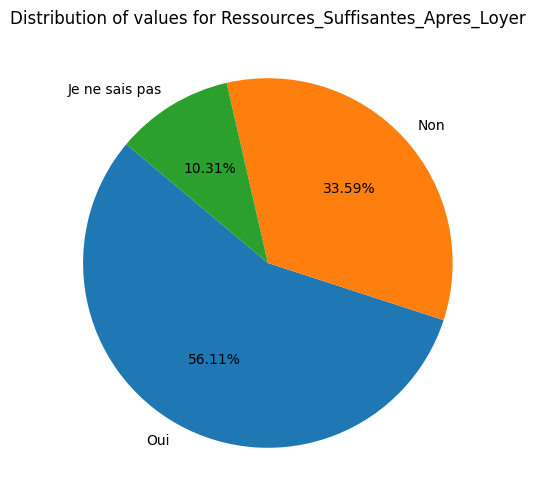

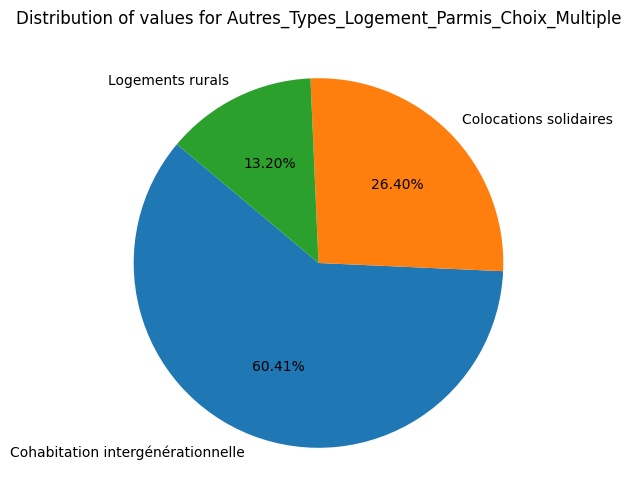

In [159]:
# Categorical Variable Distribution
study_level_distribution = df["Niveau_Etudes"].value_counts()
for col in categoricals:
    plt.figure(figsize=(8, 6))
    plt.pie(
        df[col].value_counts().values, 
        labels=df[col].value_counts().index, 
        autopct='%1.2f%%', 
        startangle=140, 
        colors=plt.cm.tab10.colors
    )
    plt.title("Distribution of values for "+ str(col))
    plt.show()

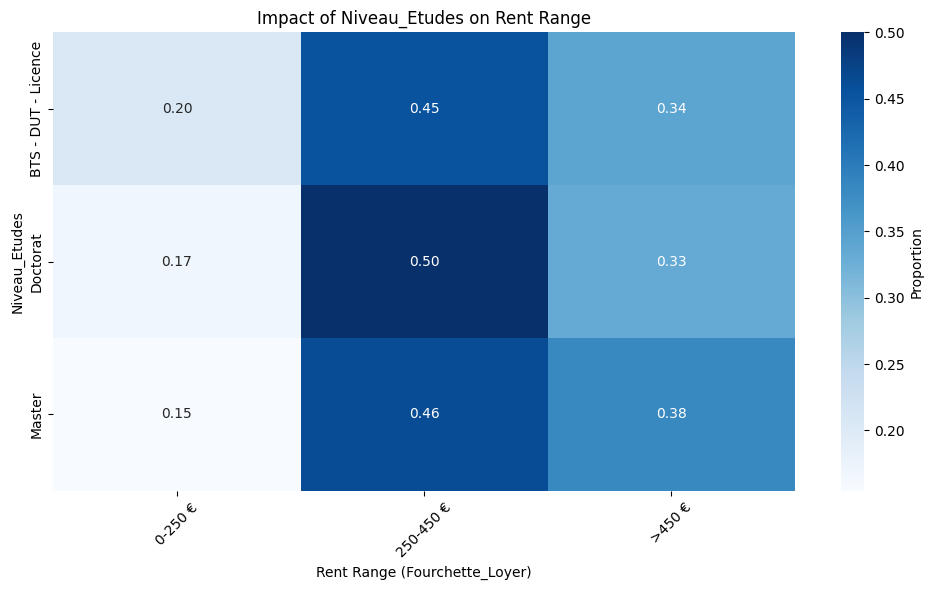

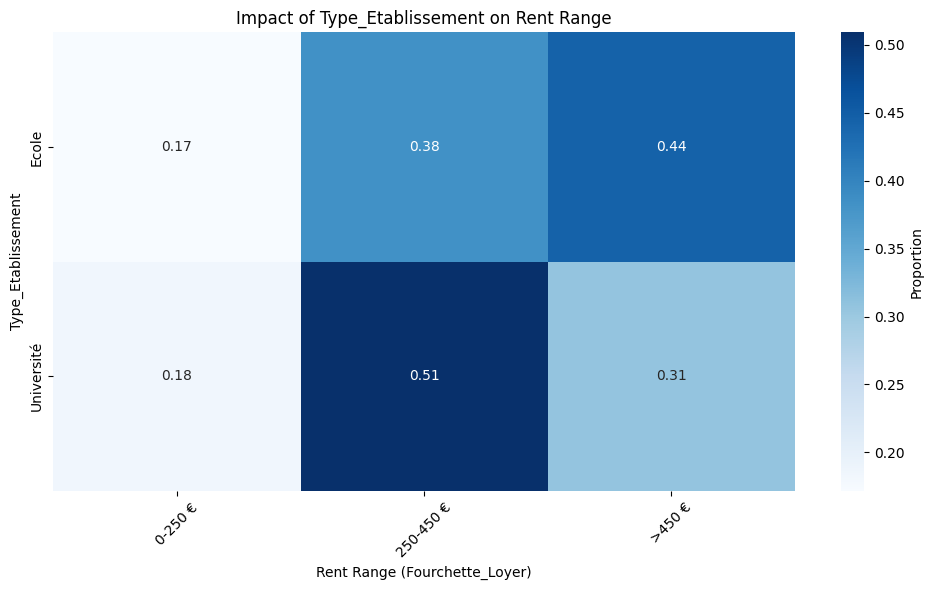

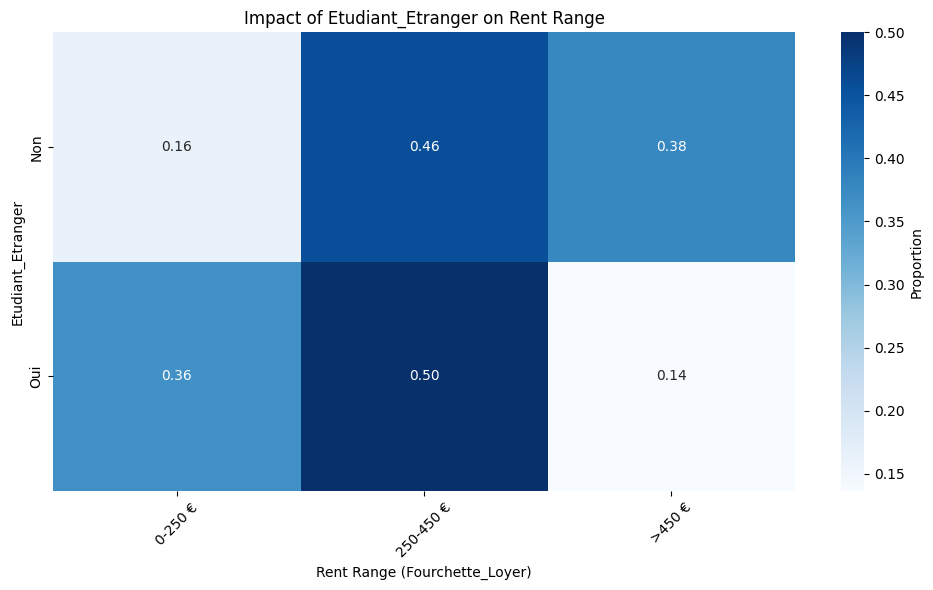

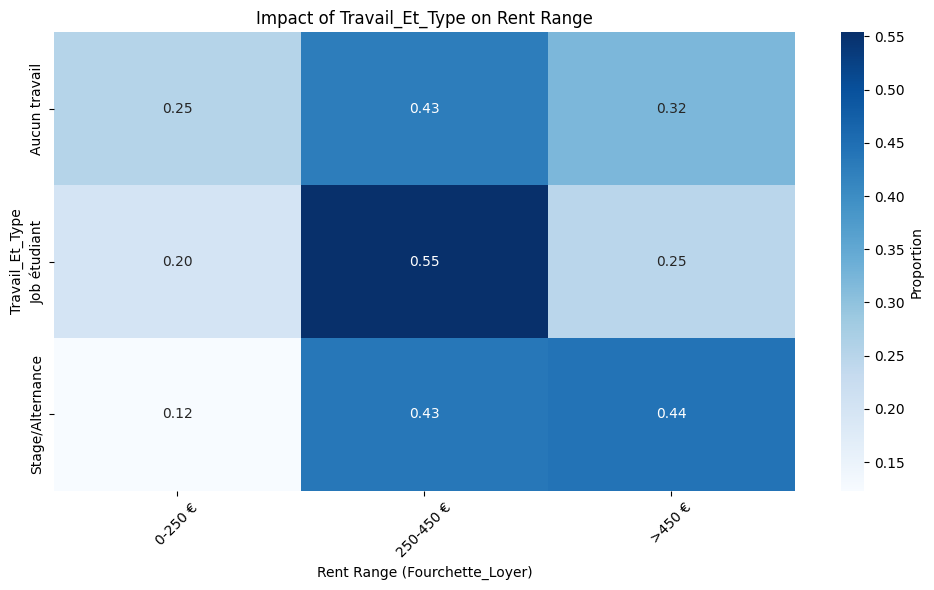

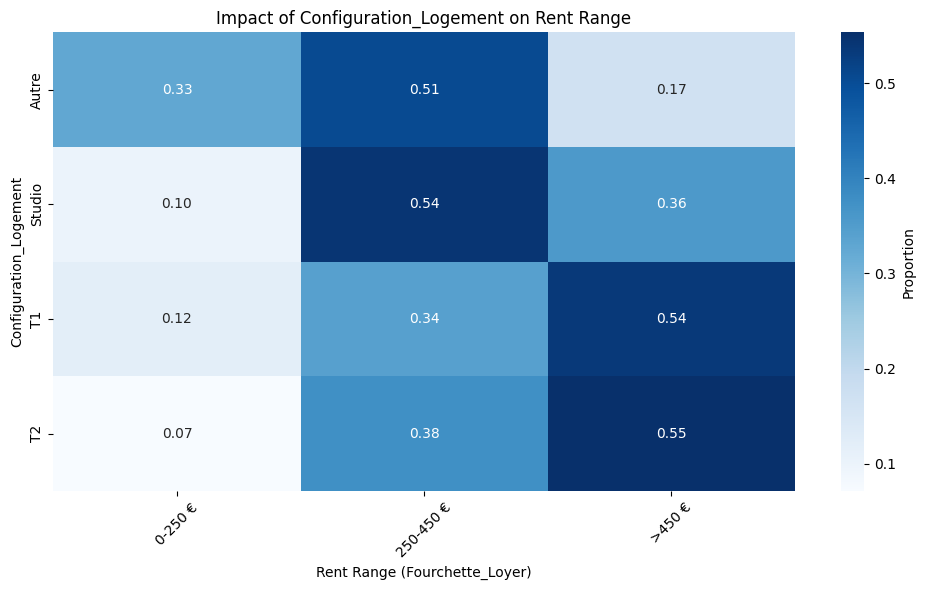

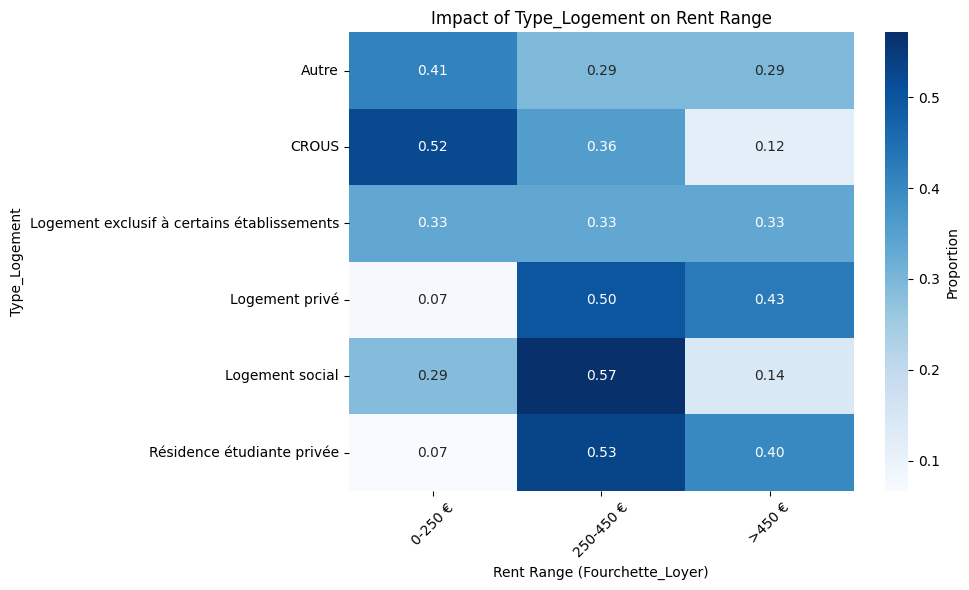

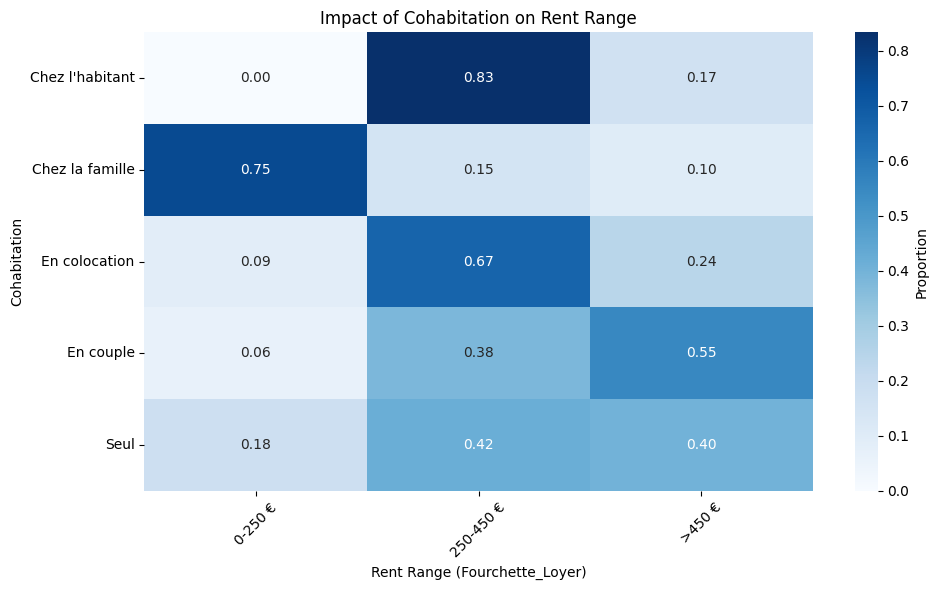

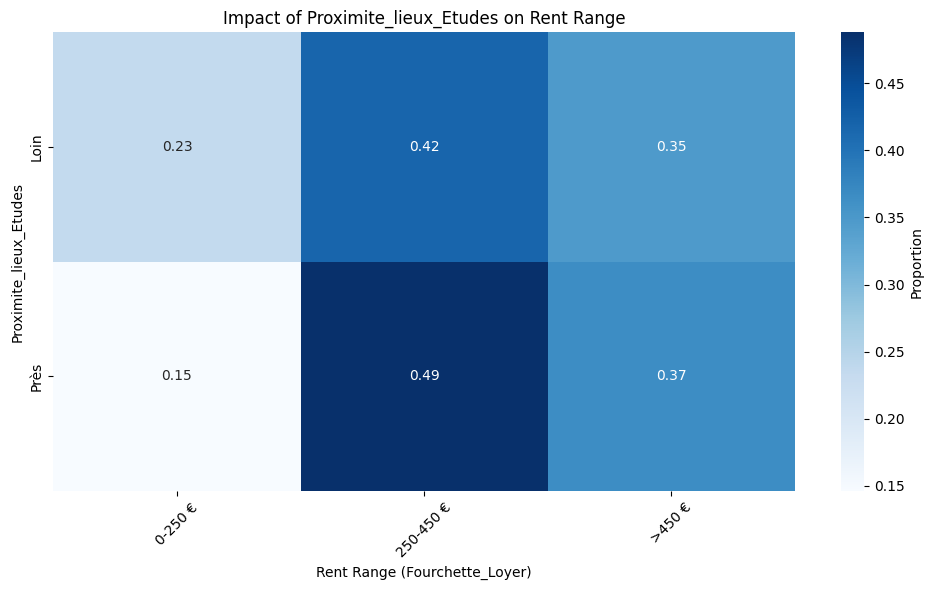

In [160]:
# Cross tabulation: Analyzing the correlations between specific values of pairs of attributes. First the factors that might influence rents
rent_factors = ['Niveau_Etudes', 'Type_Etablissement', 'Etudiant_Etranger', 'Travail_Et_Type', 'Configuration_Logement', 'Type_Logement', 'Cohabitation', 'Proximite_lieux_Etudes']

for factor in rent_factors:
    # Cross tabulation here is normalized by rows in order to be able to compare unique values effectively
    cross_tab = pd.crosstab(df[factor], df['Fourchette_Loyer'], normalize='index')

    # Heatmap for visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        cross_tab,
        annot=True,
        cmap='Blues',
        fmt='.2f',  # Proportion format
        cbar_kws={'label': 'Proportion'}  # Add color bar label
    )
    plt.title(f"Impact of {factor} on Rent Range")
    plt.xlabel("Rent Range (Fourchette_Loyer)")
    plt.ylabel(factor)
    plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
    plt.tight_layout()
    plt.show()


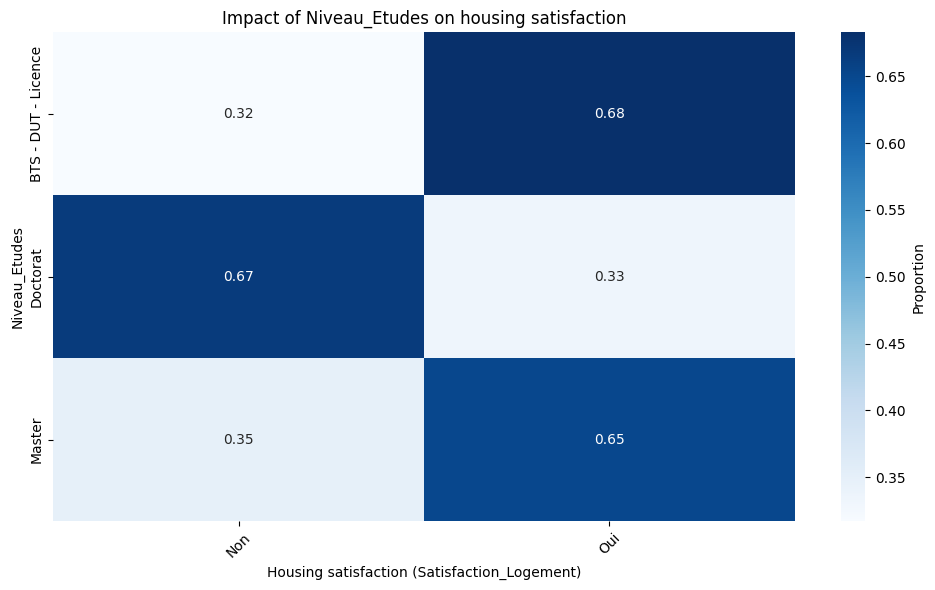

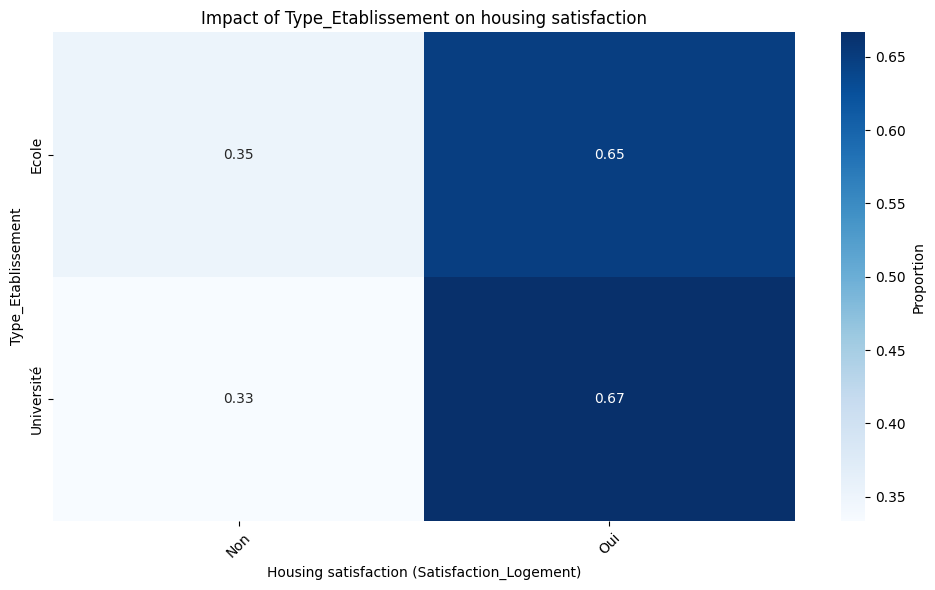

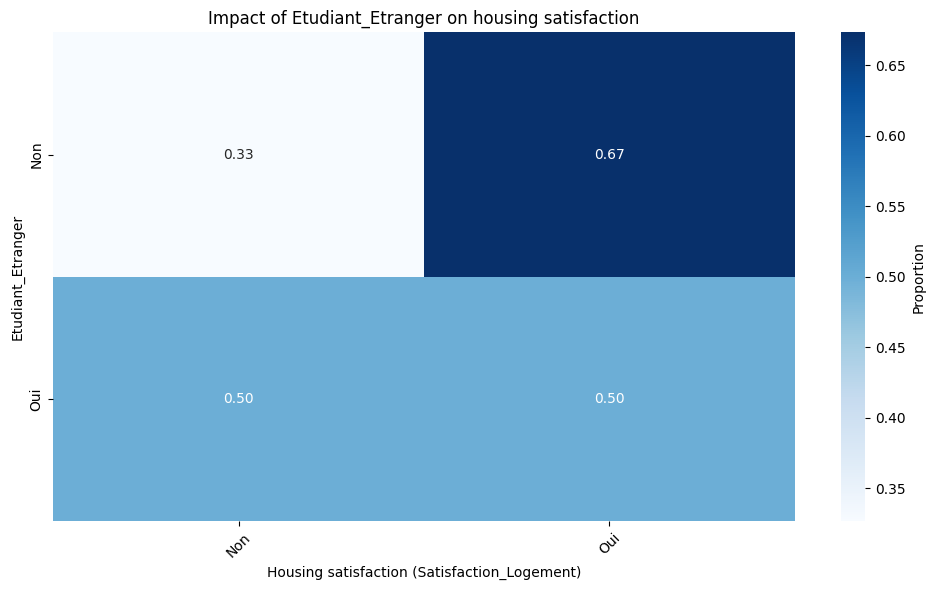

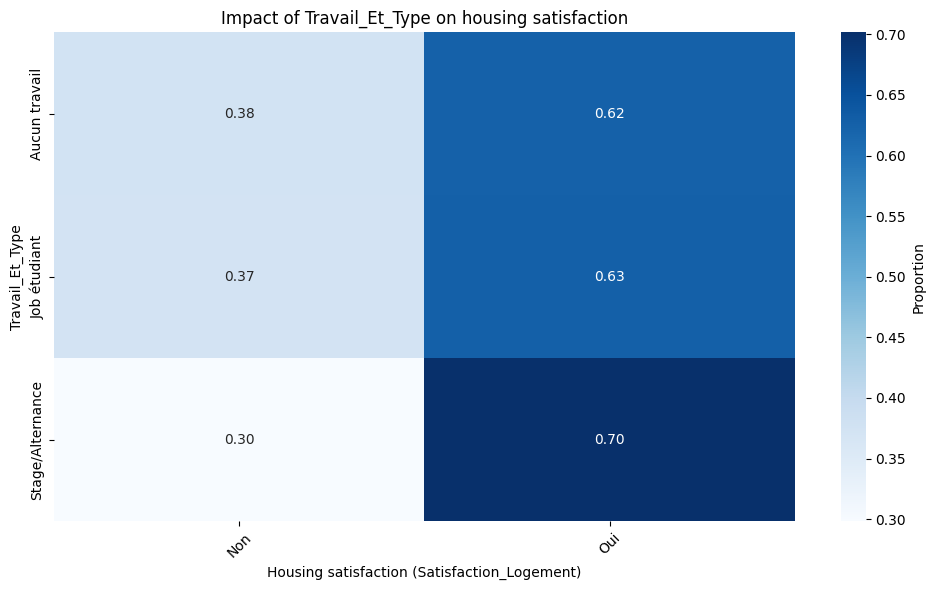

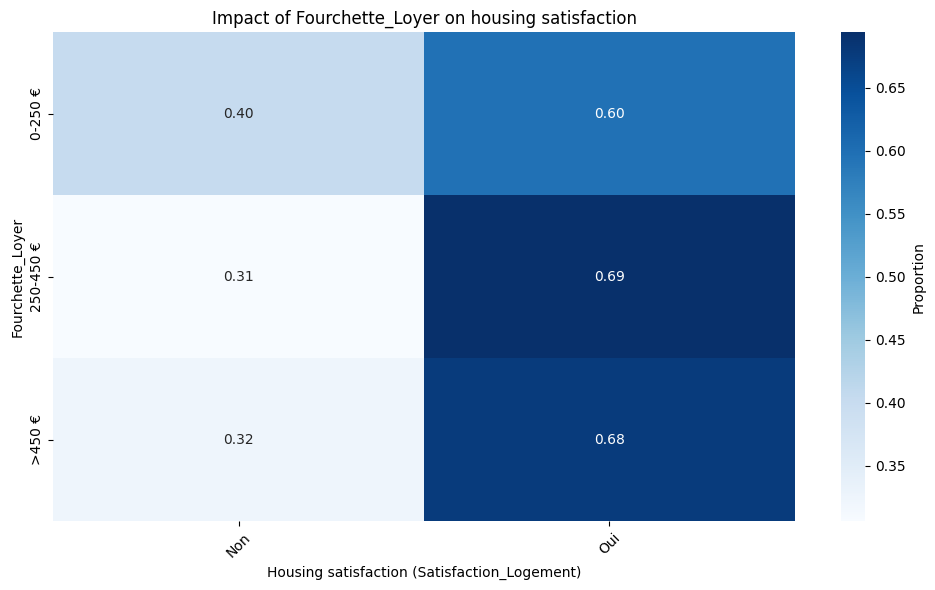

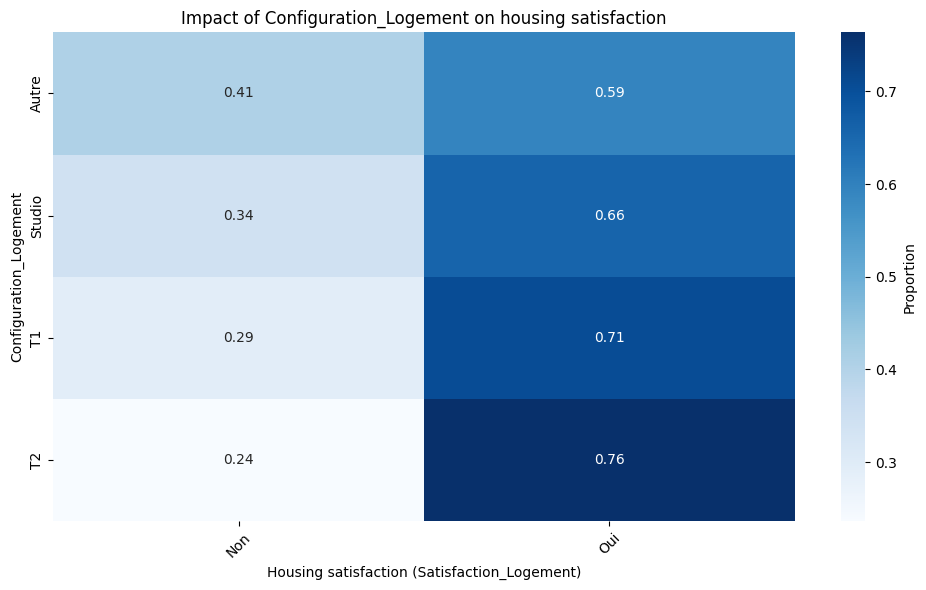

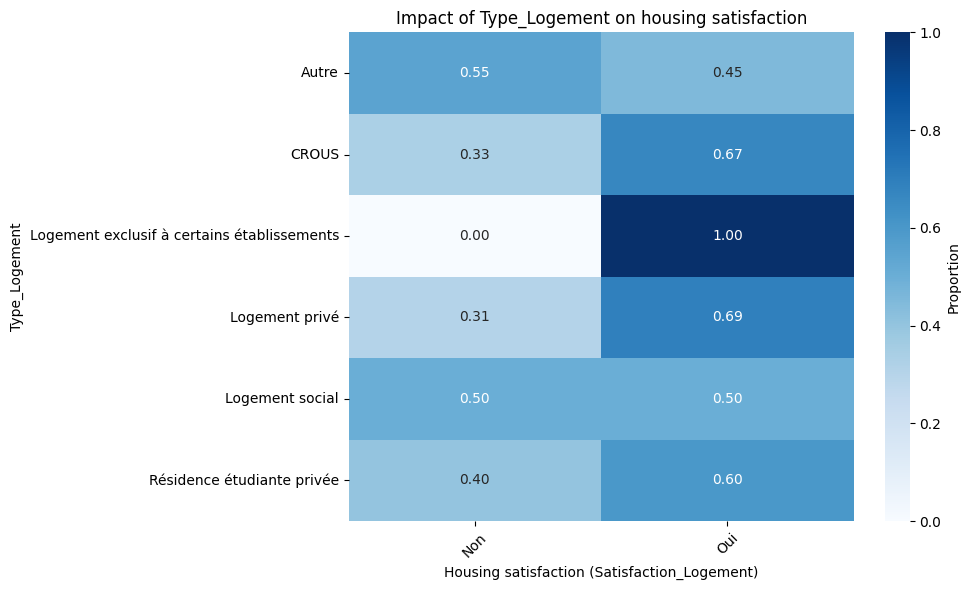

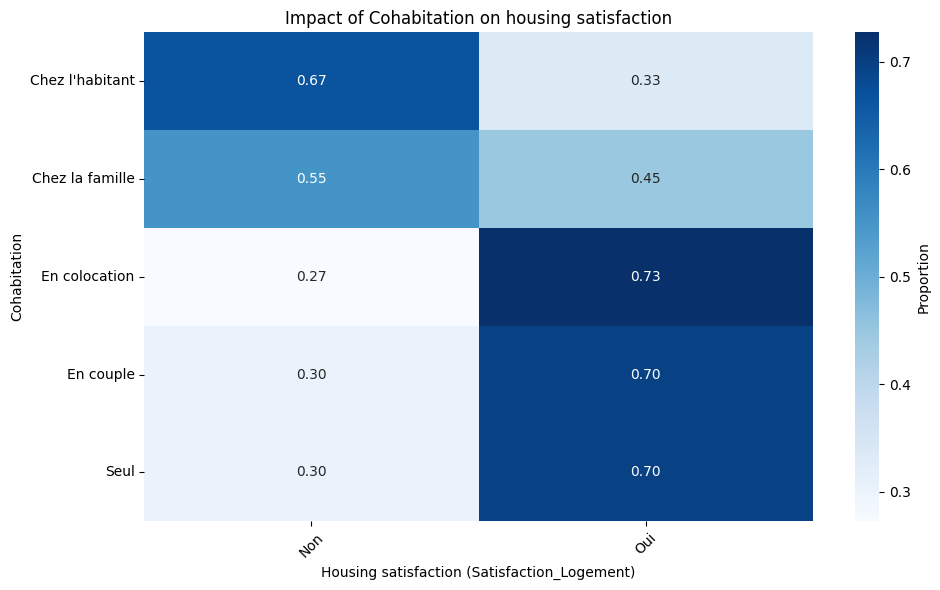

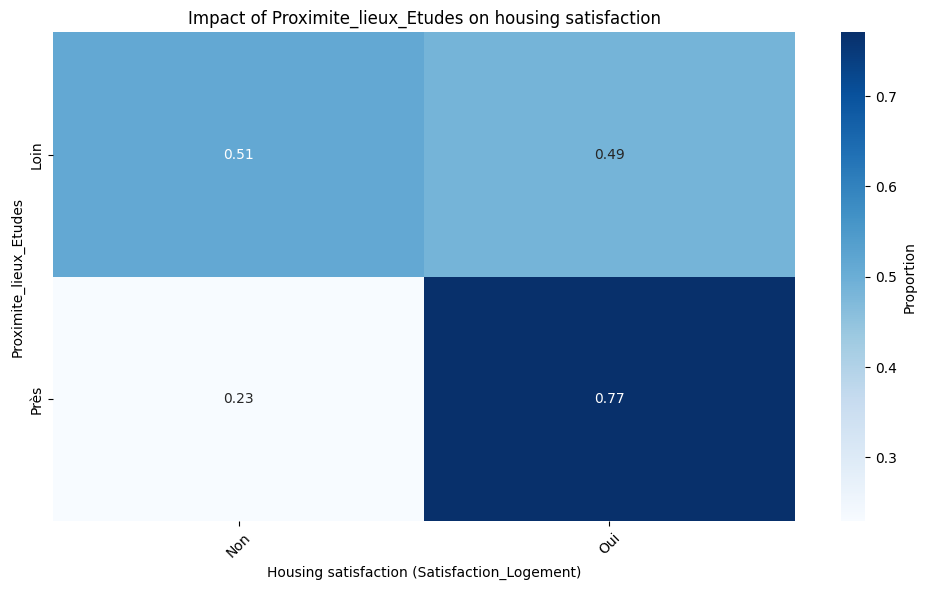

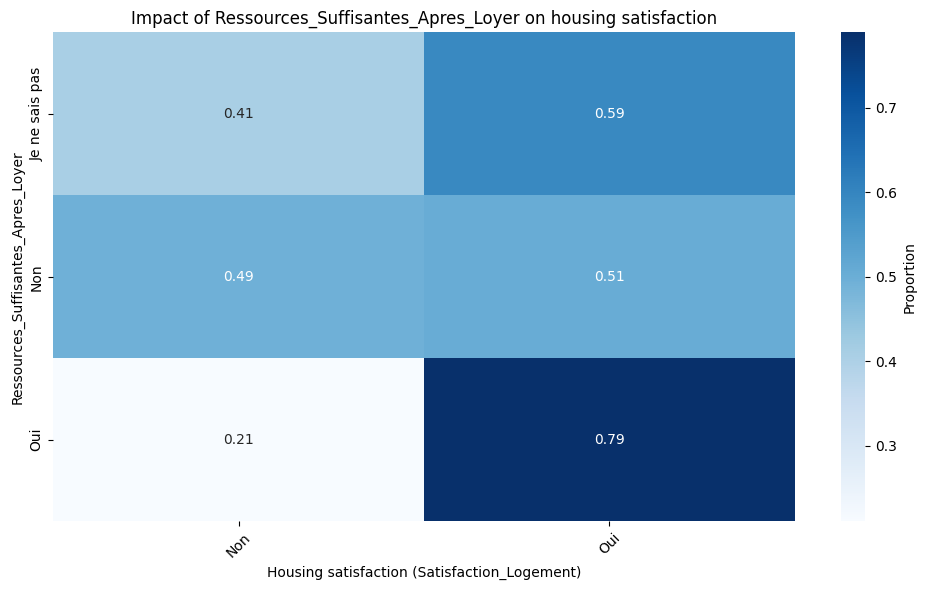

In [161]:
# Factors influencing housing satisfaction
satisfaction_factors = ['Niveau_Etudes', 'Type_Etablissement', 'Etudiant_Etranger', 'Travail_Et_Type', 'Fourchette_Loyer','Configuration_Logement', 'Type_Logement', 'Cohabitation', 'Proximite_lieux_Etudes','Ressources_Suffisantes_Apres_Loyer']
for factor in satisfaction_factors:
    # Cross tabulation here is normalized by rows in order to be able to compare unique values effectively
    cross_tab = pd.crosstab(df[factor], df['Satisfaction_Logement'], normalize='index')

    # Heatmap for visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        cross_tab,
        annot=True,
        cmap='Blues',
        fmt='.2f',  # Proportion format
        cbar_kws={'label': 'Proportion'}  # Add color bar label
    )
    plt.title(f"Impact of {factor} on housing satisfaction")
    plt.xlabel("Housing satisfaction (Satisfaction_Logement)")
    plt.ylabel(factor)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

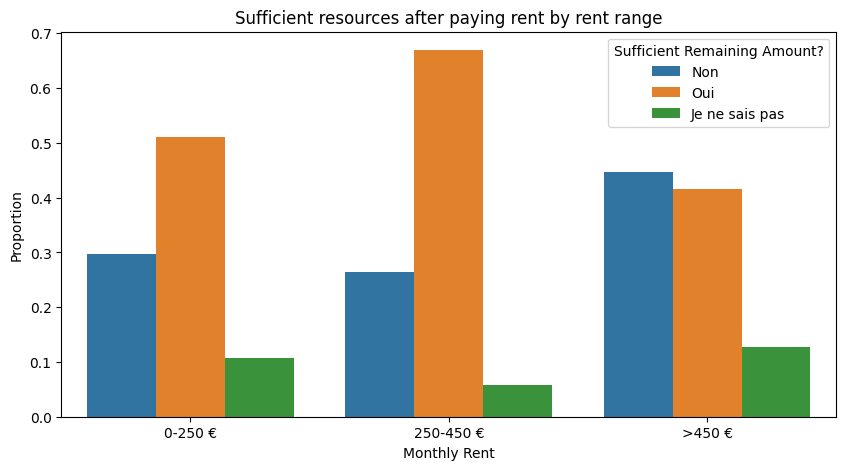

In [162]:
# Calculate proportions for each combination of rent range and response
rent_ranges = ['0-250 €', '250-450 €', '>450 €']
sufficient_ressources_after_rent = df["Ressources_Suffisantes_Apres_Loyer"].dropna().unique().tolist()
rent_ranges_sufficient_ressources = {}
for rent_range in rent_ranges:
    total = len(df[df["Fourchette_Loyer"]==rent_range])
    range_details = {}
    for val in sufficient_ressources_after_rent:
        range_details[val]=len(df[(df["Ressources_Suffisantes_Apres_Loyer"]==val) & (df["Fourchette_Loyer"]==rent_range)])/total
    rent_ranges_sufficient_ressources[rent_range] = range_details

# Convert the proportions dictionary into a long-format DataFrame
rent_ranges_sufficient_ressources_frame = (
    pd.DataFrame(rent_ranges_sufficient_ressources)
    .T.reset_index()
    .melt(id_vars='index', var_name='Enough ressources after paying rent?', value_name='Proportion')
    .rename(columns={'index': 'Rent range'})
)

# Plot using Seaborn barplot since we are dealing with proportions
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Rent range',
    y='Proportion',
    hue='Enough ressources after paying rent?',
    data=rent_ranges_sufficient_ressources_frame
)

# Add labels and title
plt.title("Sufficient resources after paying rent by rent range")
plt.xlabel("Monthly Rent")
plt.ylabel("Proportion")
plt.legend(title="Sufficient Remaining Amount?")
plt.show()




As we expect a higher proportion (about 45%) of those paying higher rents (more than 450€) express that they don't have enough money left after paying rent, however an unsual observation is that a lower proportion of those paying the cheapest rents say that they have enough ressources left after rent compared to those in the middle bracket (51% vs 70%) which means that the rent price alone isn't the souel determinant of weather or not the student has enough ressources (maybe other factors are at play, for example low rent payers are likely to be not working or are likely to be foreign students with tighter budgets)

# 3- Data mining: connecting the dots

The first overview that we took on our data as well as the exploratory allowed us to discover interesting relationships between the factors at play and make plausible hypotheses. In this step we will use data mining methods to confirm our deny our suspicions and even uncover more hidden patterns within our data

The first data mining task that we will use is exploring frequent itemsets and association rules in order to uncover the relationships between different factors and their values.
But before starting some additional preprocessing needs to be done

In order to distinguish between the similar values for different column such as the "Oui" in "Etudiant_Etranger" and the "Oui" in "Satisfaction_Logement" and "Ressources_Suffisantes_Apres_Loyer" we will add the name of the column as a prefix 

In [163]:
# Additional preprocessing before frequent itemset and association rule mining: adding col prefixes to columns with similar values (Oui, Non)
similar_value_columns = ["Etudiant_Etranger", "Satisfaction_Logement", "Ressources_Suffisantes_Apres_Loyer"]
for col in similar_value_columns:
    df[col+"_Prefixed"] = df[col].apply(lambda value : str(value)+"_"+col)

df.head()

Niveau_Etudes Type_Etablissement Etudiant_Etranger Travail_Et_Type  \
0               Master              Ecole               Non    Job étudiant   
1               Master         Université               Non   Aucun travail   
2  BTS - DUT - Licence         Université               Non    Job étudiant   
3  BTS - DUT - Licence         Université               Non    Job étudiant   
4  BTS - DUT - Licence         Université               Non   Aucun travail   

  Configuration_Logement   Type_Logement     Cohabitation  \
0                     T1  Logement privé        En couple   
1                 Studio  Logement privé             Seul   
2                  Autre  Logement privé  Chez l'habitant   
3                  Autre           CROUS             Seul   
4                 Studio  Logement privé             Seul   

  Proximite_lieux_Etudes                                 Priorites_Logement  \
0                   Loin  [Un logement spacieux, Un loyer peu élévé (cha...   
1                   Loin  [Un loyer peu élévé (charges comprises), Vivre...   
2                   Loin  [Un loyer peu élévé (charges comprises), Un lo...   
3                   Près  [Un loyer peu élévé (charges comprises), Un lo...   
4                   Loin  [Vivre seul, Un logement proche du centre-vill...   

  Satisfaction_Logement  ...  \
0                   Non  ...   
1                   Oui  ...   
2                   Non  ...   
3                   Oui  ...   
4                   Oui  ...   

               Volonte_Changement_Logement_Et_Raison  \
0  Oui, pour avoir un logement plus spacieux, mie...   
1  Si je reste réaliste, je ne changerais pas de ...   
2  - Le logement est éloigné de ma fac\r\n- je n'...   
3  Oui, par manque d'espace. J'ai conscience que ...   
4  j'aimerais bien mais ma famille est trop loin ...   

                                   Attentes_Quartier Fourchette_Loyer  \
0     sécurité, activité, commerces, bonne ambiance.           >450 €   
1  Habitant entre Wazemmes et Porte des Postes, j...        250-450 €   
2  Avoir un accès simple aux transports aux commu...        250-450 €   
3  Avoir un campus universitaire ressemblant à ce...        250-450 €   
4  Mon quartier de prédilection c'est le quartier...        250-450 €   

  Ressources_Suffisantes_Apres_Loyer  \
0                                Non   
1                                Non   
2                                Non   
3                                Oui   
4                                Non   

  Autres_Types_Logement_Parmis_Choix_Multiple Autres_Types_Logement_Libre  \
0           Cohabitation intergénérationnelle                        None   
1                      Colocations solidaires                        None   
2                      Colocations solidaires                         Non   
3                                        None                        None   
4                                        None                         Non   

                            Volonte_Vivre_Autre_Type  \
0  J'aurais aimé le faire pendant mes premières a...   
1  Non, car je suis quelqu'un de plutôt solitaire...   
2  Le souci des colocations solidaires et de la c...   
3                         Ça m'intéressait beaucoup.   
4  Non, j'ai besoin d'intimité, je veux vivre seu...   

  Etudiant_Etranger_Prefixed Satisfaction_Logement_Prefixed  \
0      Non_Etudiant_Etranger      Non_Satisfaction_Logement   
1      Non_Etudiant_Etranger      Oui_Satisfaction_Logement   
2      Non_Etudiant_Etranger      Non_Satisfaction_Logement   
3      Non_Etudiant_Etranger      Oui_Satisfaction_Logement   
4      Non_Etudiant_Etranger      Oui_Satisfaction_Logement   

  Ressources_Suffisantes_Apres_Loyer_Prefixed  
0      Non_Ressources_Suffisantes_Apres_Loyer  
1      Non_Ressources_Suffisantes_Apres_Loyer  
2      Non_Ressources_Suffisantes_Apres_Loyer  
3      Oui_Ressources_Suffisantes_Apres_Loyer  
4      Non_Ressources_Suffisantes_Apres_Loyer  

[5 rows x 22 c

In [164]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare data for itemset mining
categoricals_copy = categoricals.copy()
categoricals_copy = [col if col not in similar_value_columns else col + "_Prefixed" for col in categoricals_copy]
categoricals_copy.append("Priorites_Logement")
transactions = []

# Ensure there are no NaN or None values
for _, row in df[categoricals_copy].iterrows():
    transaction = list(row.drop("Priorites_Logement"))  # Add single-value items
    transaction.extend(row["Priorites_Logement"] if isinstance(row["Priorites_Logement"], list) else [])  # Ensure Priorites_Logement is a list
    # Remove nulls from transaction
    transaction = [item for item in transaction if (item is not None and not pd.isna(item)) ]
    if transaction:  # Avoid empty transactions
        transactions.append(transaction)

# Convert to transaction dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Perform frequent itemset mining
min_support = 0.05  # Adjust as needed
frequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)

# Generate association rules
min_confidence = 0.6  # Adjust as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Display results
print("Frequent Itemsets:")
display(frequent_itemsets)

print("\nAssociation Rules:")
display(rules)

Frequent Itemsets:


support                                           itemsets
0      0.167857                                          (0-250 €)
1      0.432143                                        (250-450 €)
2      0.335714                                           (>450 €)
3      0.314286                                    (Aucun travail)
4      0.442857                                            (Autre)
...         ...                                                ...
24410  0.064286  (Oui_Satisfaction_Logement, Près, Master, Un l...
24411  0.053571  (Oui_Satisfaction_Logement, Près, Oui_Ressourc...
24412  0.050000  (Oui_Satisfaction_Logement, Près, Université, ...
24413  0.053571  (Oui_Satisfaction_Logement, Près, Oui_Ressourc...
24414  0.057143  (Oui_Satisfaction_Logement, Près, Université, ...

[24415 rows x 2 columns]


Association Rules:


antecedents  \
0                                               (0-250 €)   
1                                               (0-250 €)   
2                                               (0-250 €)   
3                                               (0-250 €)   
4                                               (0-250 €)   
...                                                   ...   
123852  (Près, Oui_Ressources_Suffisantes_Apres_Loyer,...   
123853  (Près, Oui_Ressources_Suffisantes_Apres_Loyer,...   
123854  (Près, Oui_Ressources_Suffisantes_Apres_Loyer,...   
123855  (Oui_Ressources_Suffisantes_Apres_Loyer, Unive...   
123856  (Oui_Satisfaction_Logement, Oui_Ressources_Suf...   

                                              consequents  antecedent support  \
0                                                 (Autre)            0.167857   
1                                 (Non_Etudiant_Etranger)            0.167857   
2                     (Un logement proche des transports)            0.167857   
3                    (Un logement proche du lieu d'étude)            0.167857   
4                (Un loyer peu élévé (charges comprises))            0.167857   
...                                                   ...                 ...   
123852  (Oui_Satisfaction_Logement, Non_Etudiant_Etran...            0.085714   
123853  (Oui_Satisfaction_Logement, Un logement proche...            0.089286   
123854  (Oui_Satisfaction_Logement, Un loyer peu élévé...            0.082143   
123855                  (Oui_Satisfaction_Logement, Près)            0.092857   
123856  (Un loyer peu élévé (charges comprises), Près,...            0.092857   

        consequent support   support  confidence      lift  leverage  \
0                 0.442857  0.110714    0.659574  1.489362  0.036378   
1                 0.921429  0.139286    0.829787  0.900544 -0.015383   
2                 0.685714  0.121429    0.723404  1.054965  0.006327   
3                 0.564286  0.110714    0.659574  1.168866  0.015995   
4                 0.842857  0.150000    0.893617  1.060224  0.008520   
...                    ...       ...         ...       ...       ...   
123852            0.617857  0.057143    0.666667  1.078998  0.004184   
123853            0.450000  0.057143    0.640000  1.422222  0.016964   
123854            0.560714  0.057143    0.695652  1.240654  0.011084   
123855            0.467857  0.057143    0.615385  1.315326  0.013699   
123856            0.467857  0.057143    0.615385  1.315326  0.013699   

        conviction  zhangs_metric  
0         1.636607       0.394850  
1         0.461607      -0.117167  
2         1.136264       0.062610  
3         1.279911       0.173612  
4         1.477143       0.068261  
...            ...            ...  
123852    1.146429       0.080078  
123853    1.527778       0.325980  
123854    1.443367       0.211333  
123855    1.383571       0.264272  
123856    1.383571       0.264272  

[123857 rows x 10 columns]

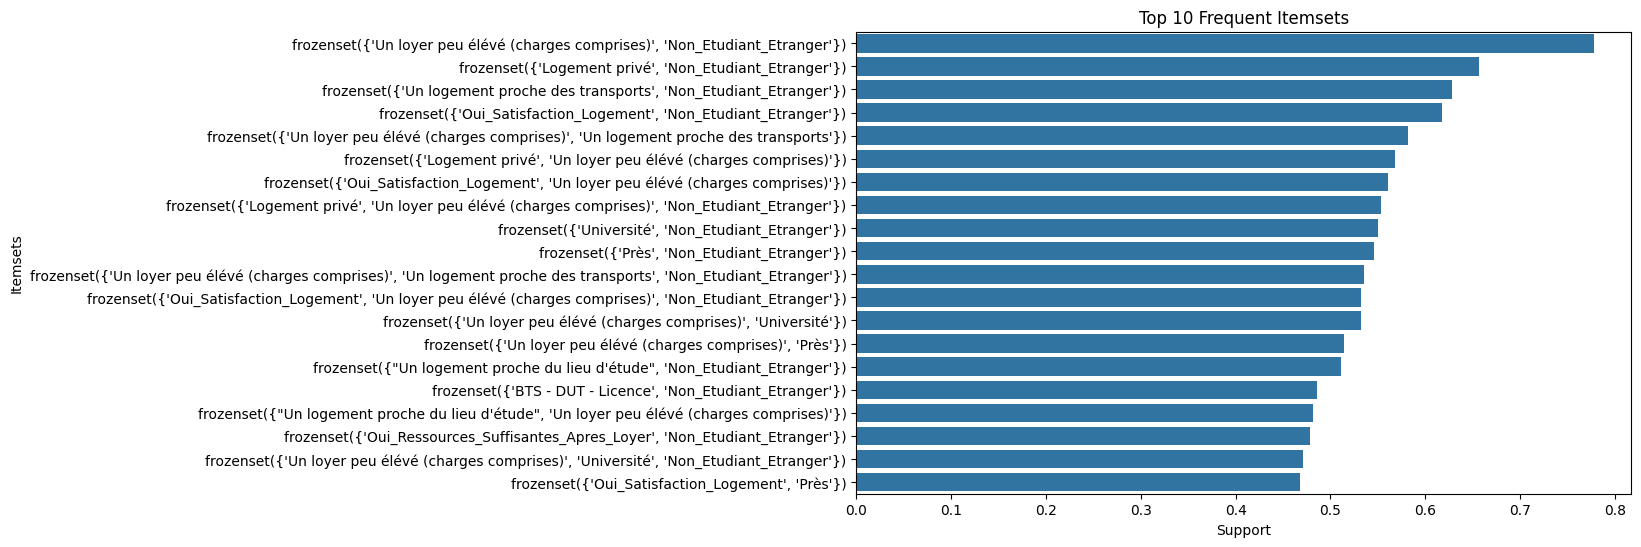

In [165]:
# Visualize frequent itemsets of at least 2 elements
multi_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=multi_itemsets.sort_values('support', ascending=False).head(20))
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

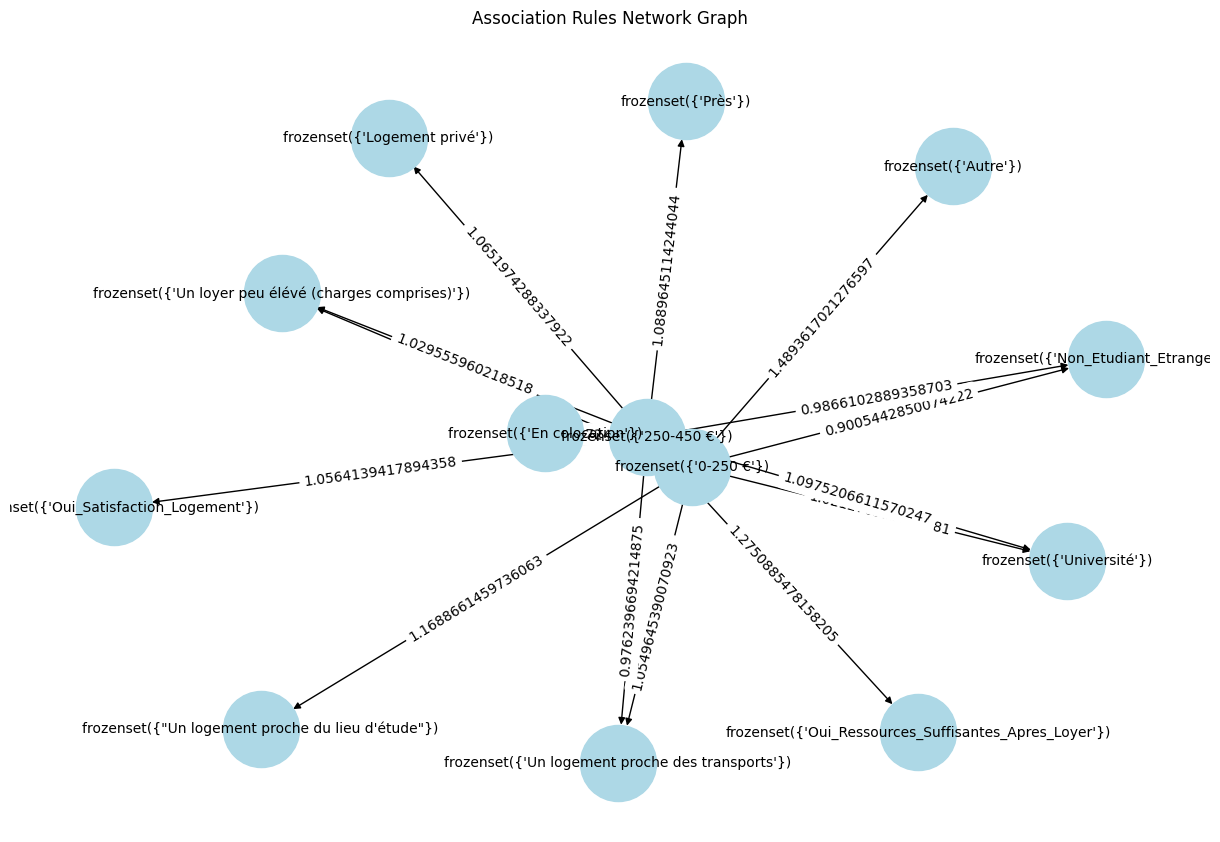

In [166]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for index, row in rules[0:15].iterrows():
    G.add_edge(frozenset(row['antecedents']), frozenset(row['consequents']), weight=row['lift'])

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # Layout
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, font_color='black', node_color='lightblue')
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.title('Association Rules Network Graph')
plt.show()


In [167]:
# Dropping the prefixed columns as they are no longer needed
df.drop([col+"_Prefixed" for col in similar_value_columns], axis=1, inplace=True)
df.head()

Niveau_Etudes Type_Etablissement Etudiant_Etranger Travail_Et_Type  \
0               Master              Ecole               Non    Job étudiant   
1               Master         Université               Non   Aucun travail   
2  BTS - DUT - Licence         Université               Non    Job étudiant   
3  BTS - DUT - Licence         Université               Non    Job étudiant   
4  BTS - DUT - Licence         Université               Non   Aucun travail   

  Configuration_Logement   Type_Logement     Cohabitation  \
0                     T1  Logement privé        En couple   
1                 Studio  Logement privé             Seul   
2                  Autre  Logement privé  Chez l'habitant   
3                  Autre           CROUS             Seul   
4                 Studio  Logement privé             Seul   

  Proximite_lieux_Etudes                                 Priorites_Logement  \
0                   Loin  [Un logement spacieux, Un loyer peu élévé (cha...   
1                   Loin  [Un loyer peu élévé (charges comprises), Vivre...   
2                   Loin  [Un loyer peu élévé (charges comprises), Un lo...   
3                   Près  [Un loyer peu élévé (charges comprises), Un lo...   
4                   Loin  [Vivre seul, Un logement proche du centre-vill...   

  Satisfaction_Logement                            Precisions_Satisfaction  \
0                   Non                                               None   
1                   Oui  J'aurais voulu aussi citer "Un logement spacie...   
2                   Non  J'étudie au campus Moulin (anciennement Lille ...   
3                   Oui                                               None   
4                   Oui                                               None   

            Methode_Recherche_Logement_Et_Difficulte  \
0                   J'ai emménagé chez ma partenaire   
1  Sur Leboncoin. \r\nEtant originaire de Savoie,...   
2                             Trouvé sur le bon coin   
3  J'ai trouvé mon logement grâce à l'ancienne pl...   
4  Sur leboncoin, ça a été compliqué, voire très ...   

               Volonte_Changement_Logement_Et_Raison  \
0  Oui, pour avoir un logement plus spacieux, mie...   
1  Si je reste réaliste, je ne changerais pas de ...   
2  - Le logement est éloigné de ma fac\r\n- je n'...   
3  Oui, par manque d'espace. J'ai conscience que ...   
4  j'aimerais bien mais ma famille est trop loin ...   

                                   Attentes_Quartier Fourchette_Loyer  \
0     sécurité, activité, commerces, bonne ambiance.           >450 €   
1  Habitant entre Wazemmes et Porte des Postes, j...        250-450 €   
2  Avoir un accès simple aux transports aux commu...        250-450 €   
3  Avoir un campus universitaire ressemblant à ce...        250-450 €   
4  Mon quartier de prédilection c'est le quartier...        250-450 €   

  Ressources_Suffisantes_Apres_Loyer  \
0                                Non   
1                                Non   
2                                Non   
3                                Oui   
4                                Non   

  Autres_Types_Logement_Parmis_Choix_Multiple Autres_Types_Logement_Libre  \
0           Cohabitation intergénérationnelle                        None   
1                      Colocations solidaires                        None   
2                      Colocations solidaires                         Non   
3                                        None                        None   
4                                        None                         Non   

                            Volonte_Vivre_Autre_Type  
0  J'aurais aimé le faire pendant mes premières a...  
1  Non, car je suis quelqu'un de plutôt solitaire...  
2  Le souci des colocations solidaires et de la c...  
3                         Ça m'intéressait beaucoup.  
4  Non, j'ai besoin d'intimité, je veux vivre seu...

The next algorithm we will apply on our data is clustering, an unsupervided learning method used to group the entries into subclasses. This can help us discover similar profiles of students based on their answers.
As clustering is sensitive to null values we will exclude the column "Autres_Types_Logement_Parmis_Choix multiple" due to its high proportion of missing entries, the rest will undergo some preprocessing before launching the clustering process

To deal with missing values within our categorical columns we will replace null entries with the most frequent value 

In [168]:
# Filling null entries with most frequent value (mode)
categoricals_for_clustering = categoricals.copy()
categoricals_for_clustering.remove("Autres_Types_Logement_Parmis_Choix_Multiple")
for col in categoricals_for_clustering:
    mode = df[col].mode()[0]
    print("Column: "+str(col))
    print("Mode: "+str(mode))
    print("Mode %: "+ str(df[col].value_counts()[0]*100/df[col].value_counts().sum()))
    print("Number of null entries: "+str(len(df[col])-df[col].value_counts().sum()))
    print("-"*50)
    df[col] = df[col].fillna(mode) 

Column: Niveau_Etudes
Mode: BTS - DUT - Licence
Mode %: 52.15827338129496
Number of null entries: 2
--------------------------------------------------
Column: Type_Etablissement
Mode: Université
Mode %: 62.5
Number of null entries: 0
--------------------------------------------------
Column: Etudiant_Etranger
Mode: Non
Mode %: 92.14285714285714
Number of null entries: 0
--------------------------------------------------
Column: Travail_Et_Type
Mode: Stage/Alternance
Mode %: 44.642857142857146
Number of null entries: 0
--------------------------------------------------
Column: Configuration_Logement
Mode: Autre
Mode %: 40.357142857142854
Number of null entries: 0
--------------------------------------------------
Column: Type_Logement
Mode: Logement privé
Mode %: 68.23104693140795
Number of null entries: 3
--------------------------------------------------
Column: Cohabitation
Mode: Seul
Mode %: 43.727598566308245
Number of null entries: 1
-----------------------------------------------

C:\Users\Youcef Islam\AppData\Local\Temp\ipykernel_8384\70673025.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Mode %: "+ str(df[col].value_counts()[0]*100/df[col].value_counts().sum()))
C:\Users\Youcef Islam\AppData\Local\Temp\ipykernel_8384\70673025.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Mode %: "+ str(df[col].value_counts()[0]*100/df[col].value_counts().sum()))
C:\Users\Youcef Islam\AppData\Local\Temp\ipykernel_8384\70673025.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

In [ ]:
# Encoding the categorical variables 
ordered_columns = ["Proximite_lieux_Etudes","Fourchette_Loyer","Niveau_Etudes"]
non_ordered_columns = [col for col in categoricals_for_clustering if col not in ordered_columns]

# one hot for columns with values that don't have an ordinal interpertation
df_for_kmeans = pd.get_dummies(df, columns=non_ordered_columns, drop_first=False)

# label for columns with values that do have an ordinal interpertation
value_orders = {
    "Proximite_lieux_Etudes" :['Près','Loin'],
    "Fourchette_Loyer": ['0-250 €', '250-450 €', '>450 €'],
    "Niveau_Etudes": ['BTS - DUT - Licence','Master', 'Doctorat']
}
for col in ordered_columns:
    df_for_kmeans[col+"_Encoded"] = pd.Categorical(df[col], categories=value_orders[col], ordered=True).codes

df_for_kmeans.head()

Niveau_Etudes Proximite_lieux_Etudes  \
0               Master                   Loin   
1               Master                   Loin   
2  BTS - DUT - Licence                   Loin   
3  BTS - DUT - Licence                   Près   
4  BTS - DUT - Licence                   Loin   

                                  Priorites_Logement  \
0  [Un logement spacieux, Un loyer peu élévé (cha...   
1  [Un loyer peu élévé (charges comprises), Vivre...   
2  [Un loyer peu élévé (charges comprises), Un lo...   
3  [Un loyer peu élévé (charges comprises), Un lo...   
4  [Vivre seul, Un logement proche du centre-vill...   

                             Precisions_Satisfaction  \
0                                               None   
1  J'aurais voulu aussi citer "Un logement spacie...   
2  J'étudie au campus Moulin (anciennement Lille ...   
3                                               None   
4                                               None   

            Methode_Recherche_Logement_Et_Difficulte  \
0                   J'ai emménagé chez ma partenaire   
1  Sur Leboncoin. \r\nEtant originaire de Savoie,...   
2                             Trouvé sur le bon coin   
3  J'ai trouvé mon logement grâce à l'ancienne pl...   
4  Sur leboncoin, ça a été compliqué, voire très ...   

               Volonte_Changement_Logement_Et_Raison  \
0  Oui, pour avoir un logement plus spacieux, mie...   
1  Si je reste réaliste, je ne changerais pas de ...   
2  - Le logement est éloigné de ma fac\r\n- je n'...   
3  Oui, par manque d'espace. J'ai conscience que ...   
4  j'aimerais bien mais ma famille est trop loin ...   

                                   Attentes_Quartier Fourchette_Loyer  \
0     sécurité, activité, commerces, bonne ambiance.           >450 €   
1  Habitant entre Wazemmes et Porte des Postes, j...        250-450 €   
2  Avoir un accès simple aux transports aux commu...        250-450 €   
3  Avoir un campus universitaire ressemblant à ce...        250-450 €   
4  Mon quartier de prédilection c'est le quartier...        250-450 €   

  Autres_Types_Logement_Parmis_Choix_Multiple Autres_Types_Logement_Libre  \
0           Cohabitation intergénérationnelle                        None   
1                      Colocations solidaires                        None   
2                      Colocations solidaires                         Non   
3                                        None                        None   
4                                        None                         Non   

   ... Cohabitation_En couple  Cohabitation_Seul  Satisfaction_Logement_Non  \
0  ...                   True              False                       True   
1  ...                  False               True                      False   
2  ...                  False              False                       True   
3  ...                  False               True                      False   
4  ...                  False               True                      False   

   Satisfaction_Logement_Oui  \
0                      False   
1                       True   
2                      False   
3                       True   
4                       True   

   Ressources_Suffisantes_Apres_Loyer_Je ne sais pas  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   Ressources_Suffisantes_Apres_Loyer_Non  \
0                                    True   
1                                    True   
2                                    True   
3                                   False   
4                                    True   

   Ressources_Suffisantes_Apres_Loyer_Oui  Proximite_lieux_Etudes_Encoded  \
0                                   False                               1   
1                                 

In [ ]:
columns_to_drop = list(set(ordered_columns) | set(free_texts) | {"Priorites_Logement", 'Autres_Types_Logement_Parmis_Choix_Multiple'})
df_for_kmeans = df_for_kmeans.drop(columns_to_drop, axis=1)
df_for_kmeans.head()

Type_Etablissement_Ecole  Type_Etablissement_Université  \
0                      True                          False   
1                     False                           True   
2                     False                           True   
3                     False                           True   
4                     False                           True   

   Etudiant_Etranger_Non  Etudiant_Etranger_Oui  \
0                   True                  False   
1                   True                  False   
2                   True                  False   
3                   True                  False   
4                   True                  False   

   Travail_Et_Type_Aucun travail  Travail_Et_Type_Job étudiant  \
0                          False                          True   
1                           True                         False   
2                          False                          True   
3                          False                          True   
4                           True                         False   

   Travail_Et_Type_Stage/Alternance  Configuration_Logement_Autre  \
0                             False                         False   
1                             False                         False   
2                             False                          True   
3                             False                          True   
4                             False                         False   

   Configuration_Logement_Studio  Configuration_Logement_T1  ...  \
0                          False                       True  ...   
1                           True                      False  ...   
2                          False                      False  ...   
3                          False                      False  ...   
4                           True                      False  ...   

   Cohabitation_En couple  Cohabitation_Seul  Satisfaction_Logement_Non  \
0                    True              False                       True   
1                   False               True                      False   
2                   False              False                       True   
3                   False               True                      False   
4                   False               True                      False   

   Satisfaction_Logement_Oui  \
0                      False   
1                       True   
2                      False   
3                       True   
4                       True   

   Ressources_Suffisantes_Apres_Loyer_Je ne sais pas  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   Ressources_Suffisantes_Apres_Loyer_Non  \
0                                    True   
1                                    True   
2                                    True   
3                                   False   
4                                    True   

   Ressources_Suffisantes_Apres_Loyer_Oui  Proximite_lieux_Etudes_Encoded  \
0                                   False                               1   
1                                   False                               1   
2                                   False                               1   
3                                    True                               0   
4                                   False                               1   

   Fourchette_Loyer_Encoded  Niveau_Etudes_Encoded  
0                         2                      1  
1                         1                      1  
2                         1                      0  
3                         1                      0  
4                         1                      0  

[5 rows x 30 columns]

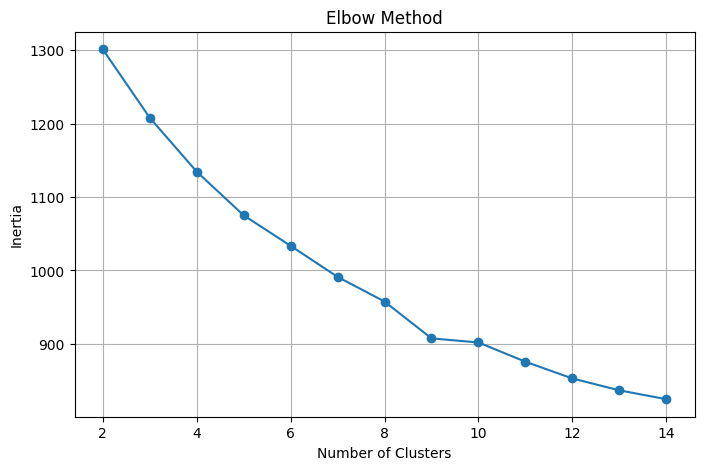

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform Elbow Method
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_for_kmeans)  # Use the prepared clustering dataset
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

The best value according to the elbow method appears to be 9 clusters

In [ ]:
optimal_k = 9 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_for_kmeans['Cluster'] = kmeans.fit_predict(df_for_kmeans)
df_for_kmeans.head()

Type_Etablissement_Ecole  Type_Etablissement_Université  \
0                      True                          False   
1                     False                           True   
2                     False                           True   
3                     False                           True   
4                     False                           True   

   Etudiant_Etranger_Non  Etudiant_Etranger_Oui  \
0                   True                  False   
1                   True                  False   
2                   True                  False   
3                   True                  False   
4                   True                  False   

   Travail_Et_Type_Aucun travail  Travail_Et_Type_Job étudiant  \
0                          False                          True   
1                           True                         False   
2                          False                          True   
3                          False                          True   
4                           True                         False   

   Travail_Et_Type_Stage/Alternance  Configuration_Logement_Autre  \
0                             False                         False   
1                             False                         False   
2                             False                          True   
3                             False                          True   
4                             False                         False   

   Configuration_Logement_Studio  Configuration_Logement_T1  ...  \
0                          False                       True  ...   
1                           True                      False  ...   
2                          False                      False  ...   
3                          False                      False  ...   
4                           True                      False  ...   

   Cohabitation_Seul  Satisfaction_Logement_Non  Satisfaction_Logement_Oui  \
0              False                       True                      False   
1               True                      False                       True   
2              False                       True                      False   
3               True                      False                       True   
4               True                      False                       True   

   Ressources_Suffisantes_Apres_Loyer_Je ne sais pas  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   Ressources_Suffisantes_Apres_Loyer_Non  \
0                                    True   
1                                    True   
2                                    True   
3                                   False   
4                                    True   

   Ressources_Suffisantes_Apres_Loyer_Oui  Proximite_lieux_Etudes_Encoded  \
0                                   False                               1   
1                                   False                               1   
2                                   False                               1   
3                                    True                               0   
4                                   False                               1   

   Fourchette_Loyer_Encoded  Niveau_Etudes_Encoded  Cluster  
0                         2                      1        7  
1                         1                      1        5  
2                         1                      0        7  
3                         1                      0        0  
4                         1                      0        5  

[5 rows x 31 columns]

In [ ]:
cluster_summary = df_for_kmeans.groupby('Cluster').mean()
display(cluster_summary)
display(df_for_kmeans['Cluster'].value_counts())


Type_Etablissement_Ecole  Type_Etablissement_Université  \
Cluster                                                            
0                        0.166667                       0.833333   
1                        0.323529                       0.676471   
2                        0.028571                       0.971429   
3                        0.176471                       0.823529   
4                        0.228571                       0.771429   
5                        0.080000                       0.920000   
6                        0.967742                       0.032258   
7                        0.692308                       0.307692   
8                        0.958333                       0.041667   

         Etudiant_Etranger_Non  Etudiant_Etranger_Oui  \
Cluster                                                 
0                     0.611111               0.388889   
1                     1.000000               0.000000   
2                     0.971429               0.028571   
3                     0.911765               0.088235   
4                     0.942857               0.057143   
5                     0.920000               0.080000   
6                     1.000000               0.000000   
7                     1.000000               0.000000   
8                     1.000000               0.000000   

         Travail_Et_Type_Aucun travail  Travail_Et_Type_Job étudiant  \
Cluster                                                                
0                             0.416667                      0.277778   
1                             0.088235                      0.147059   
2                             0.200000                      0.428571   
3                             0.647059                      0.205882   
4                             0.085714                      0.171429   
5                             0.520000                      0.280000   
6                             0.258065                      0.032258   
7                             0.153846                      0.461538   
8                             0.541667                      0.166667   

         Travail_Et_Type_Stage/Alternance  Configuration_Logement_Autre  \
Cluster                                                                   
0                                0.305556                      0.444444   
1                                0.764706                      0.058824   
2                                0.371429                      0.028571   
3                                0.147059                      0.970588   
4                                0.742857                      0.742857   
5                                0.200000                      0.000000   
6                                0.709677                      0.000000   
7                                0.384615                      0.653846   
8                                0.291667                      0.750000   

         Configuration_Logement_Studio  Configuration_Logement_T1  ...  \
Cluster                                                            ...   
0                             0.361111                   0.166667  ...   
1                             0.088235                   0.088235  ...   
2                             0.571429                   0.228571  ...   
3                             0.000000                   0.000000  ...   
4                             0.028571                   0.028571  ...   
5                             0.720000                   0.160000  ...   
6                             0.387097                   0.451613  ...   
7                             0.076923                   0.115385  ...   
8                             0.041667                   0.083333  ...   

         Cohabitation_En couple  Cohabitation_Seul  Satisfaction_Logement_Non  \
Cluster                                                                         
0                      0.000000     

Cluster
0    36
4    35
2    35
3    34
1    34
6    31
7    26
5    25
8    24
Name: count, dtype: int64

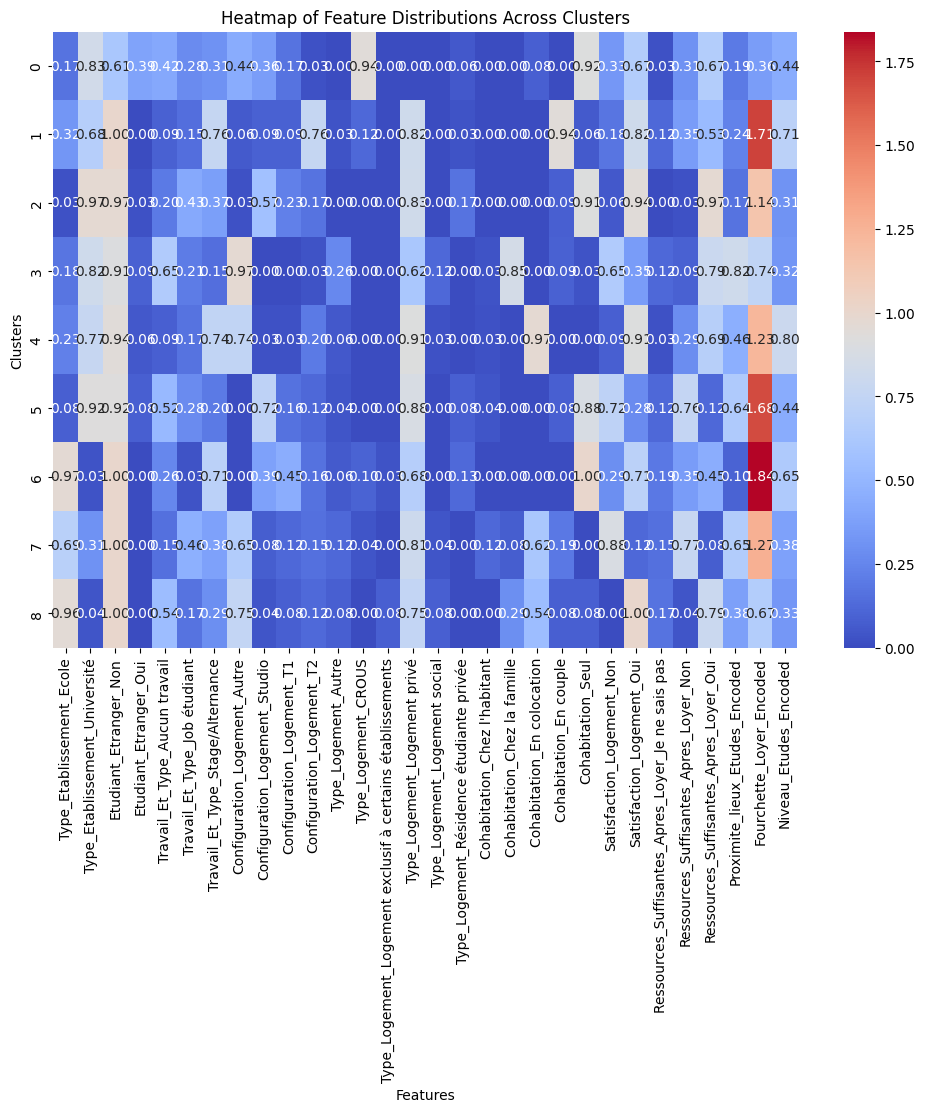

In [177]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Distributions Across Clusters")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()


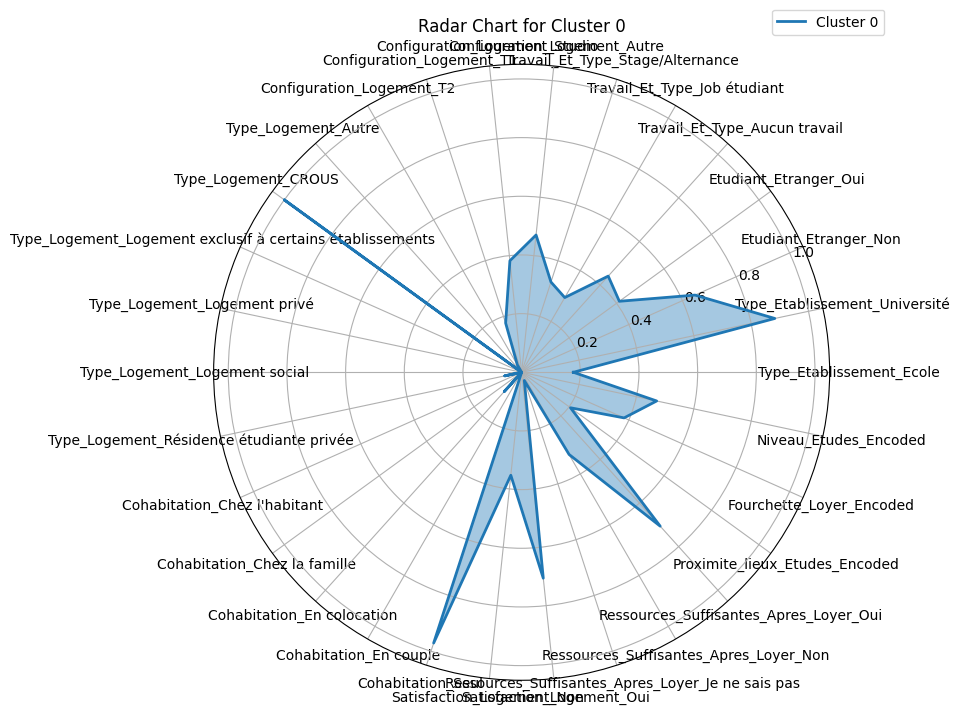

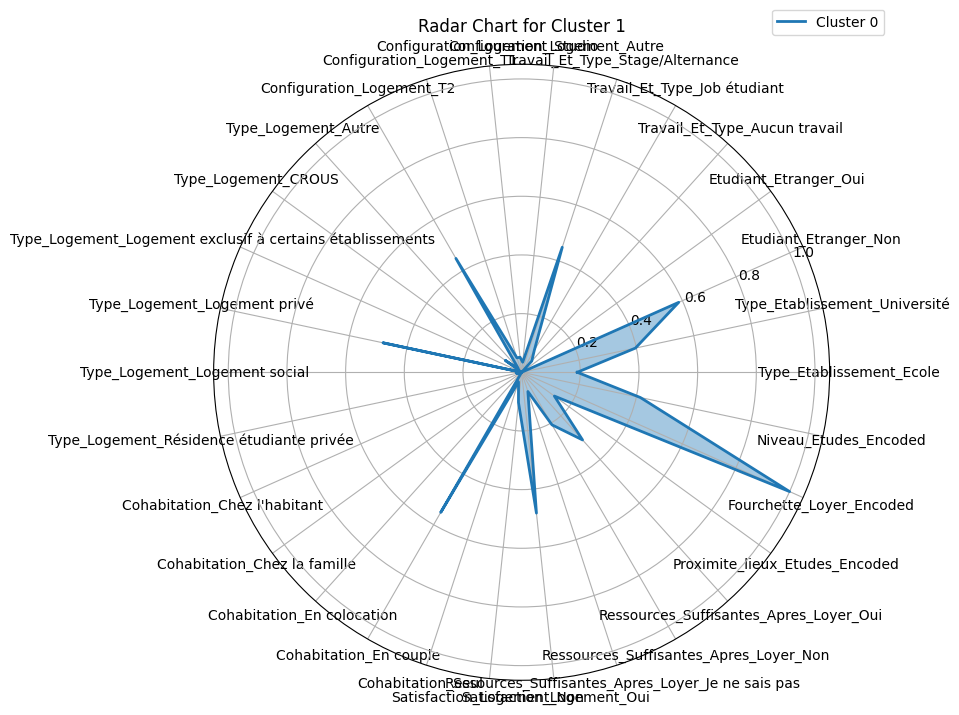

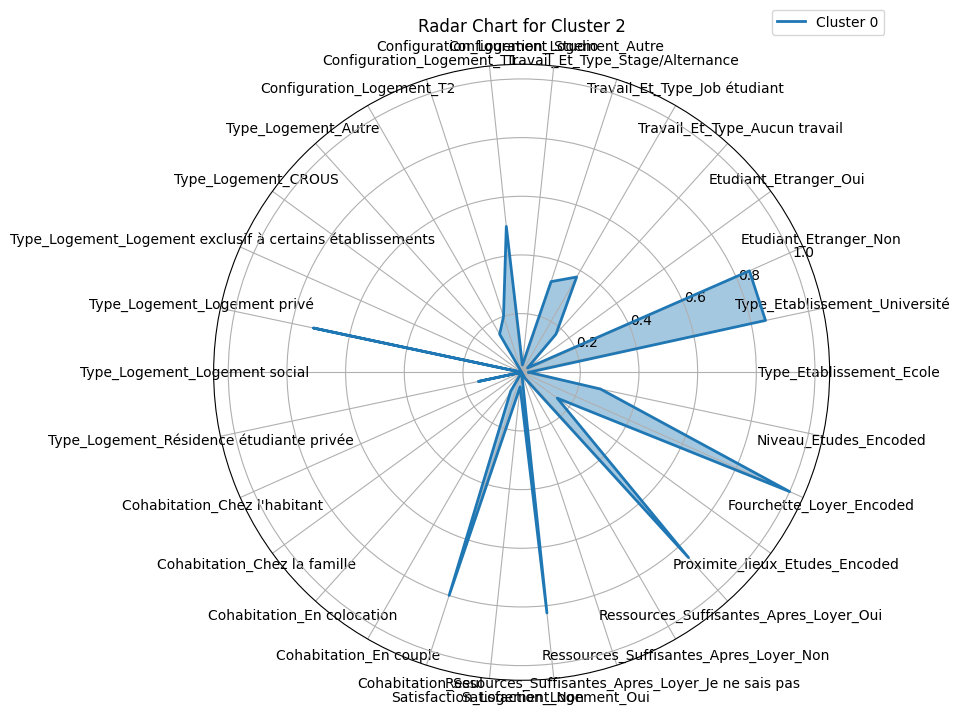

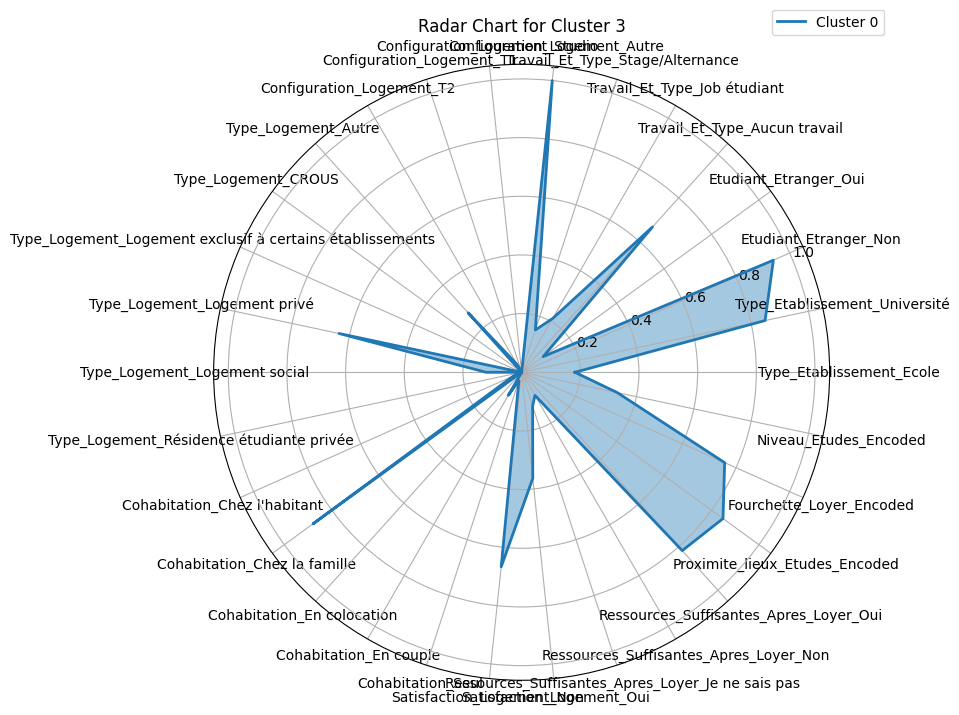

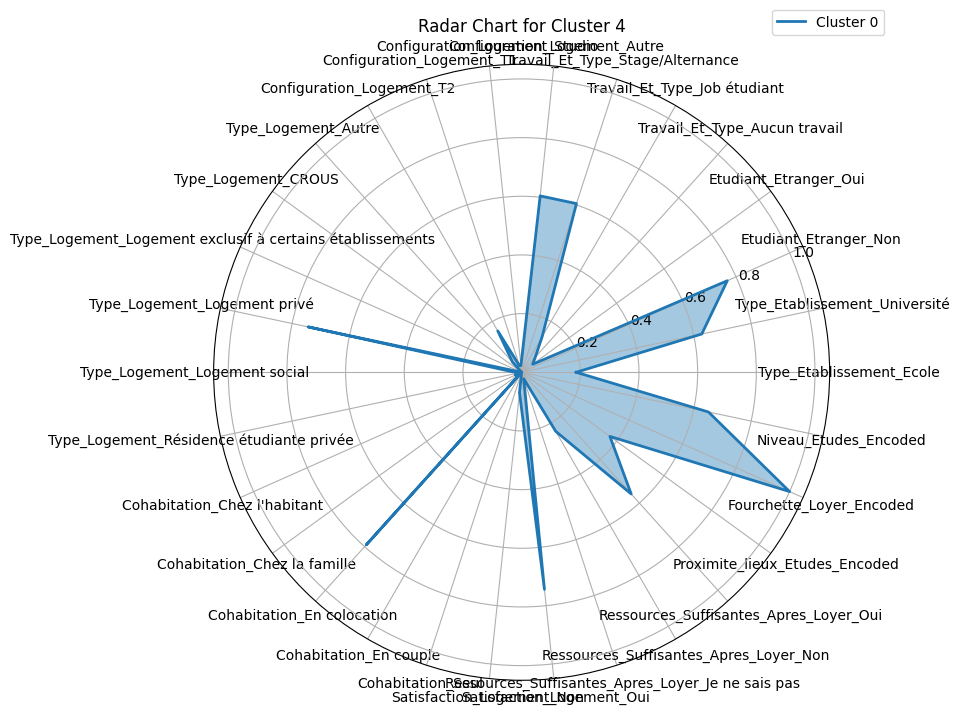

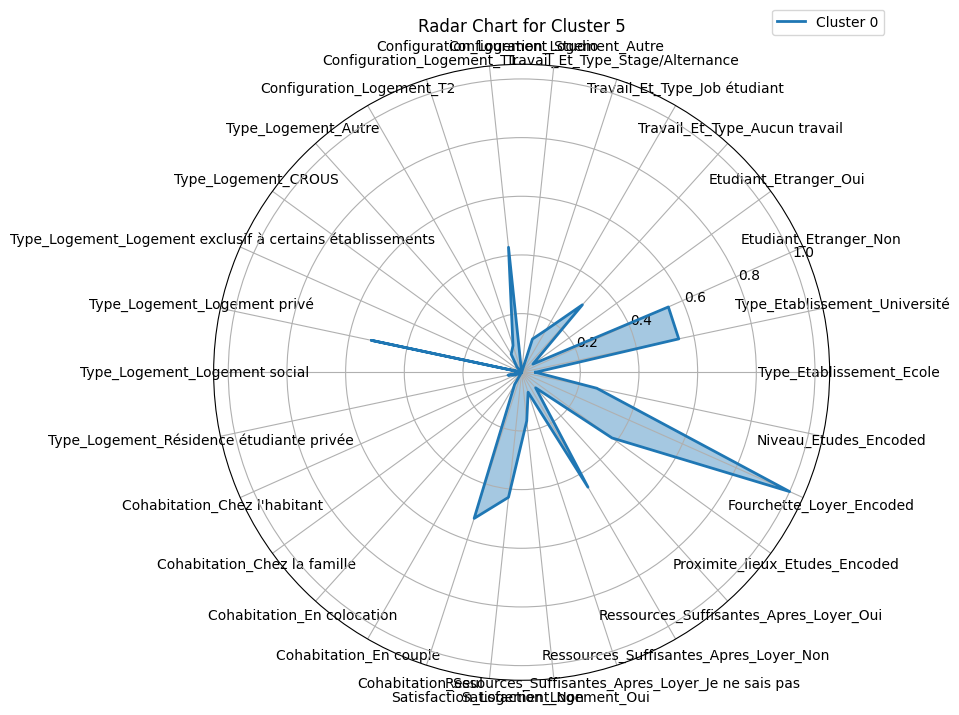

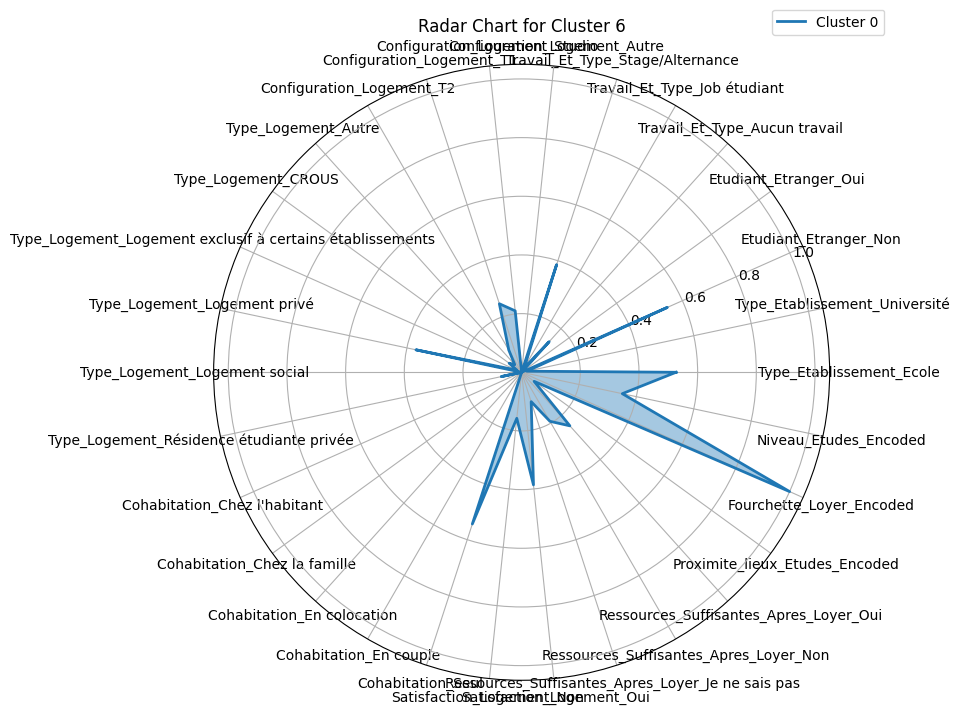

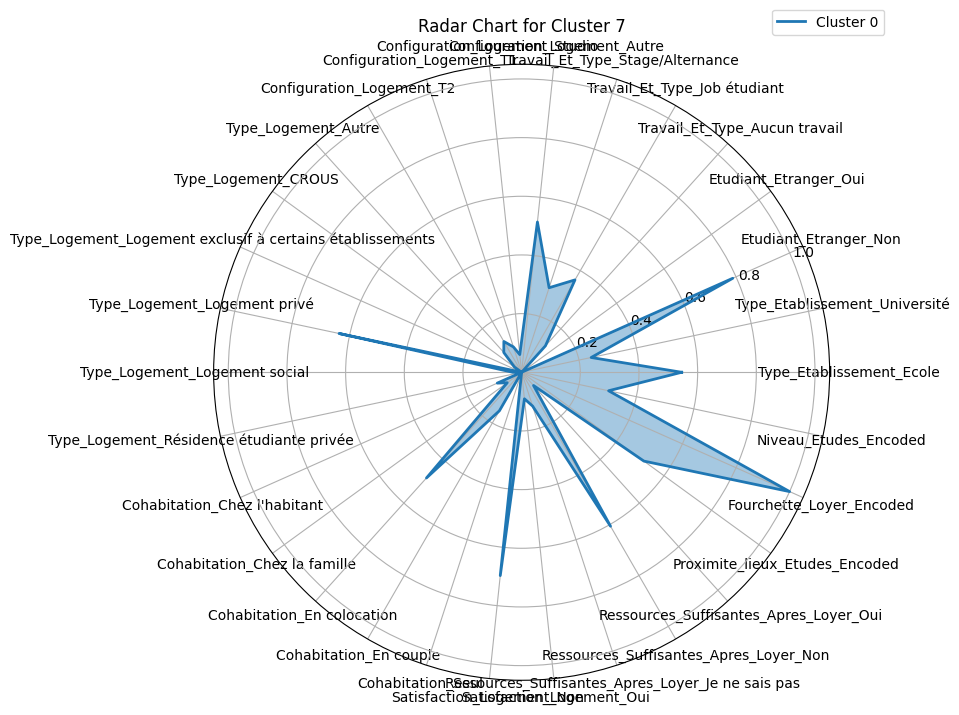

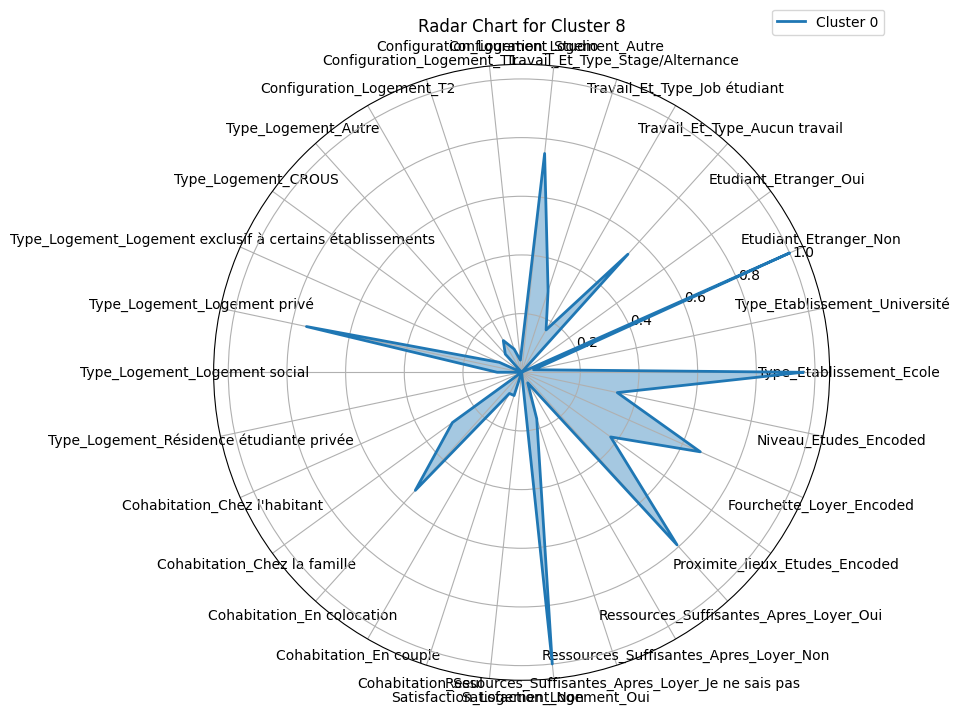

In [178]:
from math import pi

for cluster_index in range(0,9):
    cluster_data = cluster_summary.iloc[cluster_index]

    # Normalize the data for better visualization (optional)
    normalized_cluster_data = (cluster_data - cluster_data.min()) / (cluster_data.max() - cluster_data.min())

    # Prepare data for radar plot
    categories = cluster_data.index
    values = normalized_cluster_data.values.tolist()
    values += values[:1]  # Close the circle

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
    ax.plot(angles, values, linewidth=2, linestyle='solid', label='Cluster 0')
    ax.fill(angles, values, alpha=0.4)
    ax.set_thetagrids([a * 180/pi for a in angles[:-1]], categories)
    plt.title("Radar Chart for Cluster "+str(cluster_index))
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

In [ ]:
from kmodes.kmodes import KModes
n_clusters = 9  
km = KModes(n_clusters=n_clusters, init='Huang', random_state=42, n_init=10)

# Fit the model to the data
df_for_kmodes = df[categoricals_for_clustering]
clusters = km.fit_predict(df_for_kmodes)

# Add the cluster labels to the dataset
df_for_kmodes['Cluster'] = clusters

C:\Users\Youcef Islam\AppData\Local\Temp\ipykernel_8384\3874597601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Cluster'] = clusters


In [ ]:
display(df_for_kmodes.head())
centroids = pd.DataFrame(km.cluster_centroids_, columns=df_for_kmodes.columns[:-1])
display(centroids)
display(df_for_kmodes['Cluster'].value_counts())

Niveau_Etudes Type_Etablissement Etudiant_Etranger Travail_Et_Type  \
0               Master              Ecole               Non    Job étudiant   
1               Master         Université               Non   Aucun travail   
2  BTS - DUT - Licence         Université               Non    Job étudiant   
3  BTS - DUT - Licence         Université               Non    Job étudiant   
4  BTS - DUT - Licence         Université               Non   Aucun travail   

  Configuration_Logement   Type_Logement     Cohabitation  \
0                     T1  Logement privé        En couple   
1                 Studio  Logement privé             Seul   
2                  Autre  Logement privé  Chez l'habitant   
3                  Autre           CROUS             Seul   
4                 Studio  Logement privé             Seul   

  Proximite_lieux_Etudes Satisfaction_Logement Fourchette_Loyer  \
0                   Loin                   Non           >450 €   
1                   Loin                   Oui        250-450 €   
2                   Loin                   Non        250-450 €   
3                   Près                   Oui        250-450 €   
4                   Loin                   Oui        250-450 €   

  Ressources_Suffisantes_Apres_Loyer  Cluster  
0                                Non        3  
1                                Non        2  
2                                Non        6  
3                                Oui        7  
4                                Non        5

Niveau_Etudes Type_Etablissement Etudiant_Etranger   Travail_Et_Type  \
0  BTS - DUT - Licence              Ecole               Non  Stage/Alternance   
1  BTS - DUT - Licence         Université               Non      Job étudiant   
2               Master         Université               Non  Stage/Alternance   
3               Master              Ecole               Non  Stage/Alternance   
4               Master         Université               Non  Stage/Alternance   
5  BTS - DUT - Licence         Université               Non     Aucun travail   
6  BTS - DUT - Licence         Université               Non     Aucun travail   
7  BTS - DUT - Licence         Université               Non      Job étudiant   
8               Master         Université               Non  Stage/Alternance   

  Configuration_Logement   Type_Logement     Cohabitation  \
0                  Autre  Logement privé    En colocation   
1                     T1  Logement privé             Seul   
2                 Studio  Logement privé             Seul   
3                     T2  Logement privé        En couple   
4                  Autre           CROUS             Seul   
5                 Studio  Logement privé             Seul   
6                  Autre  Logement privé  Chez la famille   
7                 Studio  Logement privé             Seul   
8                  Autre  Logement privé    En colocation   

  Proximite_lieux_Etudes Satisfaction_Logement Fourchette_Loyer  \
0                   Près                   Oui        250-450 €   
1                   Près                   Oui           >450 €   
2                   Près                   Oui        250-450 €   
3                   Près                   Oui           >450 €   
4                   Près                   Non          0-250 €   
5                   Près                   Oui           >450 €   
6                   Loin                   Non        250-450 €   
7                   Près                   Oui        250-450 €   
8                   Loin                   Oui        250-450 €   

  Ressources_Suffisantes_Apres_Loyer  
0                                Oui  
1                                Non  
2                                Oui  
3                                Non  
4                                Non  
5                                Oui  
6                                Oui  
7                                Oui  
8                                Oui

Cluster
2    49
6    42
0    40
3    39
5    28
1    28
8    26
7    14
4    14
Name: count, dtype: int64

# 4- Exploiting free_text responses

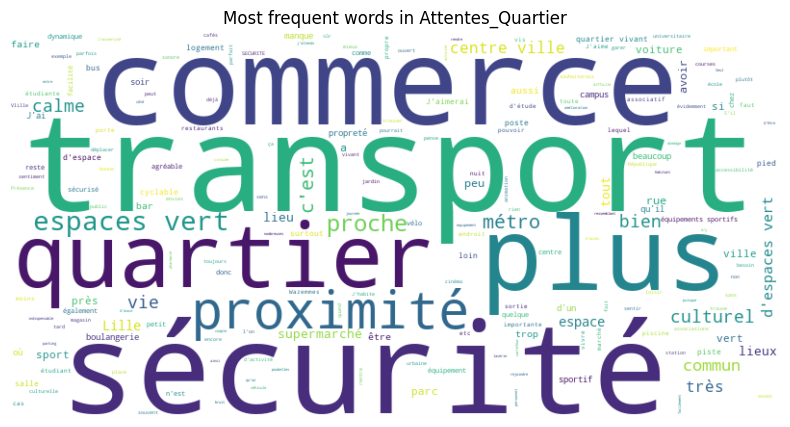

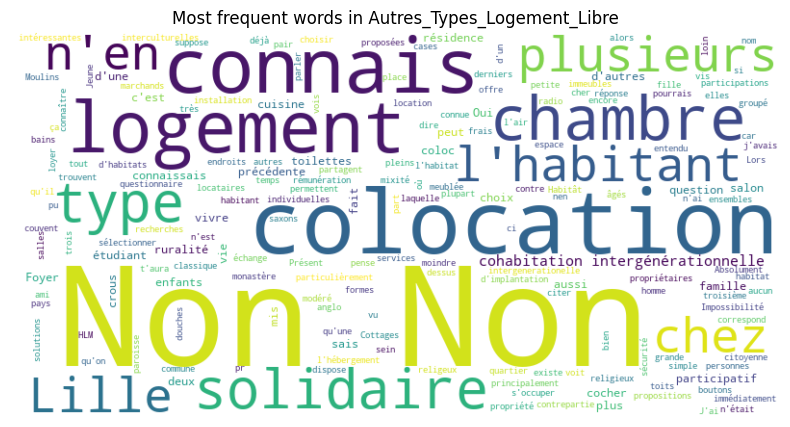

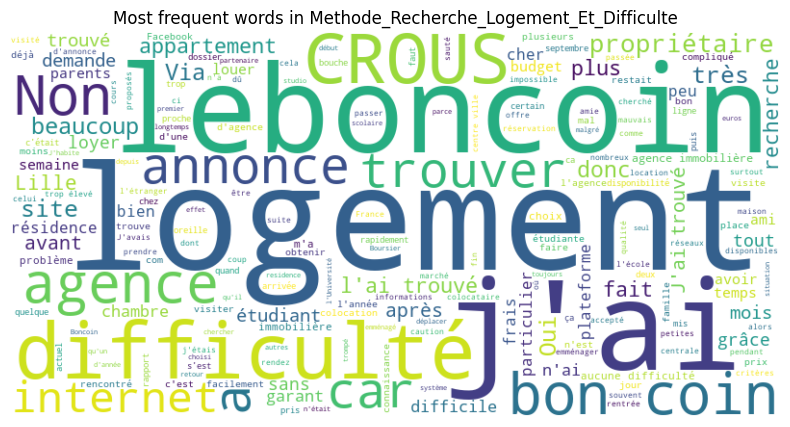

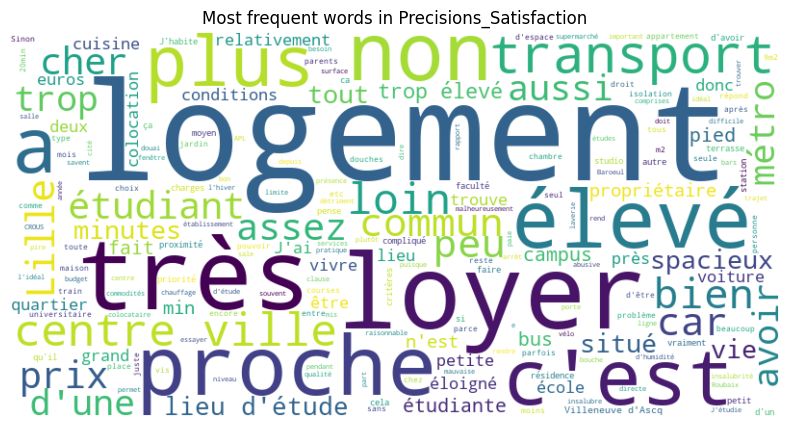

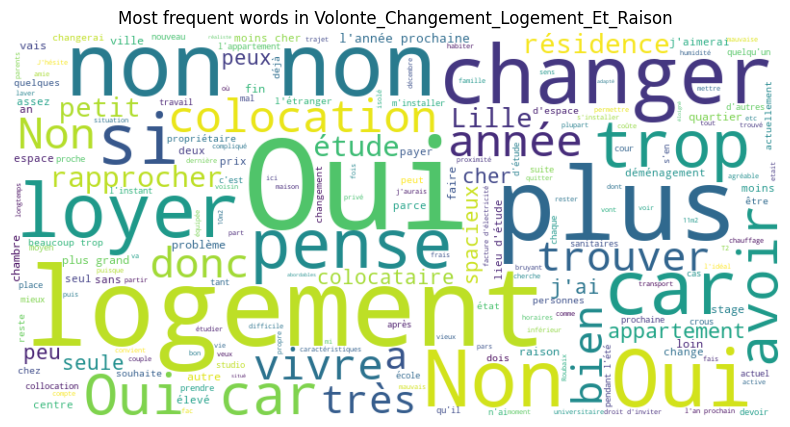

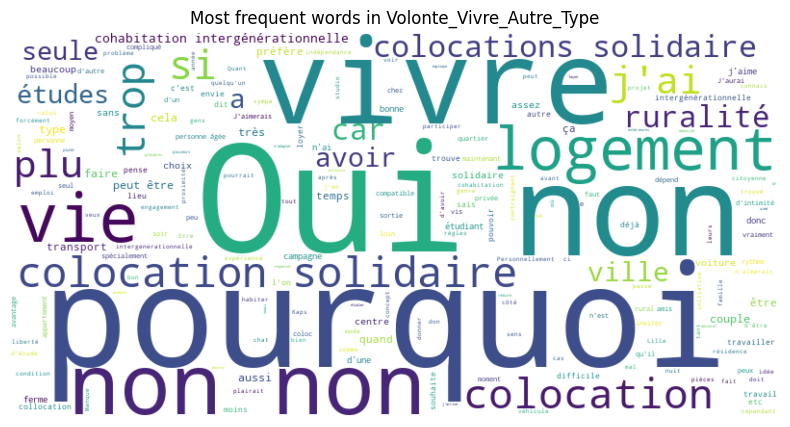

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Generate word cloud for free-text columns
for col in free_texts:
    text_data = ' '.join(df[col].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords.words("french")).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most frequent words in '+str(col))
    plt.show()